#<center> **BASE DE DADOS - TRATAMENTO E ANÁLISE**
#<center> **Evasão Escolar em Cursos Superiores da Área de TI: Um Estudo de Caso no IFPB Campina Grande**
#<center>**Aluna: Iasmin e Rayanne**
#<center>**Orientadora: Mirna**
#<center>**Disciplina: Projeto em Engenharia da Computação II**

# **Bibliotecas**

In [ ]:
!pip install fuzzywuzzy
!pip install pendulum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.0/490.0 kB 21.2 MB/s eta 0:00:00
  Created wheel for pendulum: filename=pendulum-2.1.2-cp310-cp310-manylinux_2_31_x86_64.whl size=168879 sha256=6c2010edd9274241db319a4e40783151e2bc16bf0de4b083d90eb92ffc2d47e2
  Stored in directory: /root/.cache/pip/wheels/2e/41/ed/f113e4c9dc10f6c846d69f412e9cd9aa429960a3e2e485a4f9
Successfully built pendulum


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pendulum as pdl
from google.colab import drive
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from datetime import datetime, date
from dateutil.relativedelta import relativedelta
import plotly.express as px
import plotly.graph_objects as go
import re

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# **Conectando ao Google Drive**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# **Base de dados**

####**Iasmin**

In [ ]:
path_engenharia_de_computacao = './drive/MyDrive/TCC_Dados/dados_engenharia.xls'
df_engenharia = pd.read_excel(path_engenharia_de_computacao)

In [ ]:
path_telematica = './drive/MyDrive/TCC_Dados/dados_telematica.xlsx'
df_telematica = pd.read_excel(path_telematica)

In [ ]:
df_engenharia_novo = pd.read_excel(path_engenharia_de_computacao,sheet_name="NOVO")

In [ ]:
df_telematica_novo = pd.read_excel(path_telematica,sheet_name="NOVO")

####**Rayanne**

In [ ]:
path_engenharia_de_computacao = './drive/MyDrive/TCC_DADOS/dados_engenharia.xlsx'
df_engenharia = pd.read_excel(path_engenharia_de_computacao)

In [ ]:
path_telematica = './drive/MyDrive/TCC_DADOS/dados_telematica.xlsx'
df_telematica = pd.read_excel(path_telematica)

In [ ]:
df_engenharia_novo = pd.read_excel(path_engenharia_de_computacao,sheet_name="NOVO")

In [ ]:
df_telematica_novo = pd.read_excel(path_telematica,sheet_name="NOVO")

# **Concatenando as Tabelas**

**Tabela Original**

In [ ]:
df = pd.concat([df_engenharia,df_telematica], axis=0)

**Tabela Atualizada**

In [ ]:
df_novo = pd.concat([df_engenharia_novo,df_telematica_novo], axis=0)

# **Tratamento de dados**

## **Geral**

In [ ]:
# colocando todos os valores em letras minúsculas
df = df.applymap(lambda x: str(x).lower() if isinstance(x, str) else x)

In [ ]:
df_novo = df_novo.applymap(lambda x: str(x).lower() if isinstance(x, str) else x)

In [ ]:
# colocando todos os valores em letras minúsculas
df_engenharia = df_engenharia.applymap(lambda x: str(x).lower() if isinstance(x, str) else x)

In [ ]:
# colocando todos os valores em letras minúsculas
df_telematica = df_telematica.applymap(lambda x: str(x).lower() if isinstance(x, str) else x)

In [ ]:
#verificando a soma dos valores nulos encontrados
df.isnull().sum()

#                             0
Curso                         0
Situacao                      0
Situacao no ultimo periodo    0
Ano de conclusao              0
Bairro                        0
IVS valido                    0
Coeficiente de progressao     0
Cor/Raca                      0
Cota SISTEC                   0
Data da matricula             0
Data de nascimento            0
Faixa de renda (SISTEC)       0
Forma de ingresso             0
Modalidade                    0
Naturalidade                  0
Notas da selecao              0
Sexo                          0
Tipo da escola anterior       0
Tipo da zona residencial      0
Turno                         0
Vinculo                       0
dtype: int64

In [ ]:
# Verificando quais colunas contêm valores NaN
colunas_com_nan = df.columns[df.isna().any()].tolist()
if colunas_com_nan:
    print(f'As colunas {colunas_com_nan} contêm valores NaN')
else:
    print('Não há colunas com valores NaN')

Não há colunas com valores NaN


## **Correção nomes de Bairros**

In [ ]:
base_correcao = {"sandra cavalcante": "bairro sandra cavalcante",
               "presidente medici": "presidente medice",
               "zona rural": "area rural",
               "pedregal": "pedregal 58428-158",
               "jardim paulistano": "pardim paulistano",
               "rocha cavalcante": "rocha calvocante",
               "ramadinha ii": "ramadinha 2",
               "correa lima ii": "correia lima ii",
               "tres irmas": "tres irmas (acacio figueiredo)",
               "tres irmas": "tres irmas (portal sudoeste)",
               "portal sudoeste": "portal sudoesta",
               "portal sudoeste": "portal",
               "serrotao": "sao januario-serrotao",
               "bodocongo iii": "bodocongo 3",
               "centro": "boa vista/ centro",
               "malvinas": "malvinhas",
               "universitario": "universitatio",
               "palmeira": "palmeiras",
               "mutirao": "multirao"
              }

In [ ]:
# função para encontrar a correspondência mais próxima
def get_closest_match(word, possibilities):
    if not word or not any(c.isalnum() for c in word):
        return word
    closest_match = process.extractOne(word, possibilities, scorer=fuzz.token_set_ratio)
    if closest_match[1] >= 80:
        return closest_match[0]
    else:
        return word

In [ ]:
if df['Bairro'].dtype == "object":
  df['Bairro'] = df['Bairro'].apply(lambda x: get_closest_match(x, base_correcao.keys()))

In [ ]:
# criando uma cópia do dataframe original
df_bairros = df.copy()

# aplicando o filtro para identificar as linhas que possuem "-" ou erros específicos na coluna "Bairro"
indexNames = df_bairros[(df_bairros['Bairro'] == '-') | (df_bairros['Bairro'] == '55') | (df_bairros['Bairro'] == 'a') | (df_bairros['Bairro'] == 's/n')].index

# excluindo essas linhas do dataframe temporário
df_bairros.drop(indexNames, inplace=True)


In [ ]:
if df_engenharia['Bairro'].dtype == "object":
  df_engenharia['Bairro'] = df_engenharia['Bairro'].apply(lambda x: get_closest_match(x, base_correcao.keys()))

In [ ]:
# criando uma cópia do dataframe original
df_bairros = df_engenharia.copy()

# aplicando o filtro para identificar as linhas que possuem "-" ou erros específicos na coluna "Bairro"
indexNames = df_bairros[(df_bairros['Bairro'] == '-') | (df_bairros['Bairro'] == '55') | (df_bairros['Bairro'] == 'a') | (df_bairros['Bairro'] == 's/n')].index

# excluindo essas linhas do dataframe temporário
df_bairros.drop(indexNames, inplace=True)


In [ ]:
if df_telematica['Bairro'].dtype == "object":
  df_telematica['Bairro'] = df_telematica['Bairro'].apply(lambda x: get_closest_match(x, base_correcao.keys()))

In [ ]:
# criando uma cópia do dataframe original
df_bairros = df_telematica.copy()

# aplicando o filtro para identificar as linhas que possuem "-" ou erros específicos na coluna "Bairro"
indexNames = df_bairros[(df_bairros['Bairro'] == '-') | (df_bairros['Bairro'] == '55') | (df_bairros['Bairro'] == 'a') | (df_bairros['Bairro'] == 's/n')].index

# excluindo essas linhas do dataframe temporário
df_bairros.drop(indexNames, inplace=True)


## **Renomeando Colunas dos DataFrames Concatenados**

In [ ]:
df.rename(columns = {'Cor/Raca':'Cor_Raca'}, inplace = True)
df.rename(columns = {'Situacao no ultimo periodo':'Situacao_no_ultimo_periodo'}, inplace = True)
df.rename(columns = {'Ano de conclusao':'Ano_de_conclusao'}, inplace = True)
df.rename(columns = {'IVS valido':'IVS_valido'}, inplace = True)
df.rename(columns = {'Coeficiente de progressao':'Coeficiente_de_progressao'}, inplace = True)
df.rename(columns = {'Cota SISTEC':'Cota_SISTEC'}, inplace = True)
df.rename(columns = {'Data da matricula':'Data_da_matricula'}, inplace = True)
df.rename(columns = {'Data de nascimento':'Data_de_nascimento'}, inplace = True)
df.rename(columns = {'Faixa de renda (SISTEC)':'Faixa_de_renda_(SISTEC)'}, inplace = True)
df.rename(columns = {'Forma de ingresso':'Forma_de_ingresso'}, inplace = True)
df.rename(columns = {'Notas da selecao':'Notas_da_selecao'}, inplace = True)
df.rename(columns = {'Tipo da escola anterior':'Tipo_da_escola_anterior'}, inplace = True)
df.rename(columns = {'Tipo da zona residencial':'Tipo_da_zona_residencial'}, inplace = True)

In [ ]:
df_novo.rename(columns = {'Ano de ingresso':'Ano_de_ingresso'}, inplace = True)
df_novo.rename(columns = {'Situacao no ultimo periodo':'Situacao_no_ultimo_periodo'}, inplace = True)
df_novo.rename(columns = {'Ano de conclusao':'Ano_de_conclusao'}, inplace = True)
df_novo.rename(columns = {'Diarios matriculados no ultimo periodo':'Diarios_matriculados_no_ultimo_periodo'}, inplace = True)
df_novo.rename(columns = {'Data da matricula':'Data_da_matricula'}, inplace = True)
df_novo.rename(columns = {'Data de conclusao':'Data_de_conclusao'}, inplace = True)
df_novo.rename(columns = {'Forma de ingresso':'Forma_de_ingresso'}, inplace = True)
df_novo.rename(columns = {'Tipo da escola anterior':'Tipo_da_escola_anterior'}, inplace = True)
df_novo.rename(columns = {'Tipo da zona residencial':'Tipo_da_zona_residencial'}, inplace = True)

In [ ]:
df_engenharia.rename(columns = {'Cor/Raca':'Cor_Raca'}, inplace = True)
df_engenharia.rename(columns = {'Situacao no ultimo periodo':'Situacao_no_ultimo_periodo'}, inplace = True)
df_engenharia.rename(columns = {'Ano de conclusao':'Ano_de_conclusao'}, inplace = True)
df_engenharia.rename(columns = {'IVS valido':'IVS_valido'}, inplace = True)
df_engenharia.rename(columns = {'Coeficiente de progressao':'Coeficiente_de_progressao'}, inplace = True)
df_engenharia.rename(columns = {'Cota SISTEC':'Cota_SISTEC'}, inplace = True)
df_engenharia.rename(columns = {'Data da matricula':'Data_da_matricula'}, inplace = True)
df_engenharia.rename(columns = {'Data de nascimento':'Data_de_nascimento'}, inplace = True)
df_engenharia.rename(columns = {'Faixa de renda (SISTEC)':'Faixa_de_renda_(SISTEC)'}, inplace = True)
df_engenharia.rename(columns = {'Forma de ingresso':'Forma_de_ingresso'}, inplace = True)
df_engenharia.rename(columns = {'Notas da selecao':'Notas_da_selecao'}, inplace = True)
df_engenharia.rename(columns = {'Tipo da escola anterior':'Tipo_da_escola_anterior'}, inplace = True)
df_engenharia.rename(columns = {'Tipo da zona residencial':'Tipo_da_zona_residencial'}, inplace = True)

In [ ]:
df_telematica.rename(columns = {'Cor/Raca':'Cor_Raca'}, inplace = True)
df_telematica.rename(columns = {'Situacao no ultimo periodo':'Situacao_no_ultimo_periodo'}, inplace = True)
df_telematica.rename(columns = {'Ano de conclusao':'Ano_de_conclusao'}, inplace = True)
df_telematica.rename(columns = {'IVS valido':'IVS_valido'}, inplace = True)
df_telematica.rename(columns = {'Coeficiente de progressao':'Coeficiente_de_progressao'}, inplace = True)
df_telematica.rename(columns = {'Cota SISTEC':'Cota_SISTEC'}, inplace = True)
df_telematica.rename(columns = {'Data da matricula':'Data_da_matricula'}, inplace = True)
df_telematica.rename(columns = {'Data de nascimento':'Data_de_nascimento'}, inplace = True)
df_telematica.rename(columns = {'Faixa de renda (SISTEC)':'Faixa_de_renda_(SISTEC)'}, inplace = True)
df_telematica.rename(columns = {'Forma de ingresso':'Forma_de_ingresso'}, inplace = True)
df_telematica.rename(columns = {'Notas da selecao':'Notas_da_selecao'}, inplace = True)
df_telematica.rename(columns = {'Tipo da escola anterior':'Tipo_da_escola_anterior'}, inplace = True)
df_telematica.rename(columns = {'Tipo da zona residencial':'Tipo_da_zona_residencial'}, inplace = True)

In [ ]:
df_telematica_novo.rename(columns = {'Ano de ingresso':'Ano_de_ingresso'}, inplace = True)
df_telematica_novo.rename(columns = {'Tipo da escola anterior':'Tipo_da_escola_anterior'}, inplace = True)

## **Agrupando os Tipos de Forma de ingresso**

In [ ]:
df['Forma_de_ingresso'] = df['Forma_de_ingresso'].replace( ['sistema de selecao unificada (sisu)', 'sisu (inativa)', 'sisu - ampla concorrencia (inativa)', 'sisu - cota_eep/ppi (inativa)', 'sisu - cota_eep (inativa)',  'sisu - cota_eep/renda/ppi (inativa)','sisu - cota_eep/renda (inativa)','sisu - cota_pcd (inativa)'], 'sistema de selecao unificada (sisu)')
df['Forma_de_ingresso'].unique()

array(['sistema de selecao unificada (sisu)',
       'processo seletivo especial de cursos superiores (pse)',
       'processo seletivo de cursos superiores (pscs)',
       'processo seletivo especifico',
       'outra forma de ingresso (inativa)', 'selecao (inativa)',
       'processo seletivo simplificado (inativa)',
       'selecao de graduados (inativa)',
       'processo seletivo superior (inativa)',
       'transferencia externa voluntaria (inativa)',
       'processo seletivo especial (inativa)',
       'processo seletivo interno (inativa)', 'judicial (inativa)',
       'reingresso de ex-alunos (inativa)',
       'processo seletivo unificado (inativa)'], dtype=object)

In [ ]:
df_engenharia['Forma_de_ingresso'] = df_engenharia['Forma_de_ingresso'].replace( ['sistema de selecao unificada (sisu)', 'sisu (inativa)', 'sisu - ampla concorrencia (inativa)', 'sisu - cota_eep/ppi (inativa)', 'sisu - cota_eep (inativa)',  'sisu - cota_eep/renda/ppi (inativa)','sisu - cota_eep/renda (inativa)','sisu - cota_pcd (inativa)'], 'sistema de selecao unificada (sisu)')
df_engenharia['Forma_de_ingresso'].unique()

array(['sistema de selecao unificada (sisu)',
       'processo seletivo especial de cursos superiores (pse)',
       'processo seletivo de cursos superiores (pscs)',
       'processo seletivo especifico'], dtype=object)

In [ ]:
df_telematica['Forma_de_ingresso'] = df_telematica['Forma_de_ingresso'].replace( ['sistema de selecao unificada (sisu)', 'sisu (inativa)', 'sisu - ampla concorrencia (inativa)', 'sisu - cota_eep/ppi (inativa)', 'sisu - cota_eep (inativa)',  'sisu - cota_eep/renda/ppi (inativa)','sisu - cota_eep/renda (inativa)','sisu - cota_pcd (inativa)'], 'sistema de selecao unificada (sisu)')
df_telematica['Forma_de_ingresso'].unique()

array(['sistema de selecao unificada (sisu)',
       'outra forma de ingresso (inativa)', 'selecao (inativa)',
       'processo seletivo de cursos superiores (pscs)',
       'processo seletivo simplificado (inativa)',
       'selecao de graduados (inativa)',
       'processo seletivo superior (inativa)',
       'transferencia externa voluntaria (inativa)',
       'processo seletivo especial de cursos superiores (pse)',
       'processo seletivo especial (inativa)',
       'processo seletivo interno (inativa)',
       'processo seletivo especifico', 'judicial (inativa)',
       'reingresso de ex-alunos (inativa)',
       'processo seletivo unificado (inativa)'], dtype=object)

## **Convertendo data de nascimento na idade**

In [ ]:
def idade(born):
    if born!= '-':
      born = datetime.strptime(born, "%d/%m/%Y").date()
      today = date.today()
      return int(today.year - born.year - ((today.month,
                                        today.day) < (born.month,
                                                      born.day)))

In [ ]:
lista_idades = df['Data_de_nascimento'].apply(idade)

In [ ]:
df.insert(13, "Idade", lista_idades, True)

In [ ]:
lista_idades1 = df_engenharia['Data_de_nascimento'].apply(idade)

In [ ]:
df_engenharia.insert(13, "Idade", lista_idades1, True)

In [ ]:
lista_idades2 = df_telematica['Data_de_nascimento'].apply(idade)

In [ ]:
df_telematica.insert(13, "Idade", lista_idades2, True)

## **Filtrando IVS válido**

In [ ]:
lista_ivs = df['IVS_valido'].to_list()

In [ ]:
sim = [
    '<span class="status status-success">sim</span>'
]

nao = [
    '<span class="status status-error">nao</span>'
]

In [ ]:
for i in range(len(lista_ivs)):
  ivs = lista_ivs[i]
  if ivs in sim:
    lista_ivs[i] = 'sim'
  elif ivs in nao:
    lista_ivs[i] = 'nao'

In [ ]:
df['IVS_valido'] = lista_ivs

# **Análise de dados**

## **Perfil geral dos alunos (Sem filtro de situação)**


### **Quantidade Total de Alunos**


In [ ]:
df_situacao_geral = df['Situacao'].value_counts().to_frame()
df_situacao_geral.rename(columns={'Situacao': 'Value'})

,Value
matriculado,652
evadido,614
cancelado voluntariamente,308
formado,169
cancelado compulsoriamente,115
trancado,77
trancado voluntariamente,24
intercambio,11
vinculado,7
afastado,5


In [ ]:
total_alunos = df_situacao_geral['Situacao'].sum()

In [ ]:
fig = go.Figure()
fig = go.Figure(go.Indicator(
    mode = "number",
    value = total_alunos,))
fig.update_layout(
    template = {'data' : {'indicator': [{
        'title': {'text': "TOTAL DE ALUNOS DOS CURSOS DE TIC - IFPB"},}]
                         }})
fig.show()

### **Aluno por Situação**

In [ ]:
valor_absoluto = df['Situacao'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df['Situacao'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(porcentagem,
             orientation='h',text=[i+' ' + str('{:,.2f}'.format(j)) +' %' for i,j in zip(valor_absoluto.index,porcentagem)],color_discrete_sequence=[colors],
            )
fig.update_layout(width = 950, height = 500, plot_bgcolor = 'white',
                  margin = dict(t=10, l=10, r=0, b=10),
                  yaxis={'categoryorder':'total descending'},
                  legend=dict(title='Situação dos Alunos nos cursos de TIC'),
                  showlegend=True
                 )
fig.update_traces(textposition='auto')
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

In [ ]:
df_situacao_geral.insert(1, "Porcentagem", porcentagem.value_counts().index, True)

In [ ]:
fig = px.bar(df_situacao_geral,x=df_situacao_geral.index,y='Situacao',title='Quantidade de alunos por todas as situações',text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem)])
fig.update_layout(yaxis={'title':'Quantidade de Alunos'},
                   xaxis={'title': 'Situacao'})
fig.show()

### **Alunos por Modalidade**

In [ ]:
colors = ['#33e0ff','#ff33dd']
fig = px.pie(df, values=df['Modalidade'].value_counts(), names=df['Modalidade'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_traces(textposition='outside', textinfo='percent+label',
                  hole=.6, hoverinfo="label+percent+name",title='Alunos por Modalidade')
fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

### **Alunos por Sexo**

In [ ]:
colors = ['#33e0ff','#ff33dd']
fig = px.pie(df, values=df['Sexo'].value_counts(), names=df['Sexo'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_traces(textposition='outside', textinfo='percent+label',
                  hole=.6, hoverinfo="label+percent+name",title='Alunos por Sexo')
fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [ ]:
colors = ['#33e0ff','#ff33dd']
df_formados = df[df.Situacao=='formado']
fig = px.pie(df_formados, values=df_formados['Sexo'].value_counts(), names=df_formados['Sexo'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_traces(textposition='outside', textinfo='percent+label',
                  hole=.6, hoverinfo="label+percent+name",title='Alunos por Sexo')
fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [ ]:
colors = ['#33e0ff','#ff33dd']
fig = px.pie(df_engenharia, values=df_engenharia['Sexo'].value_counts(), names=df_engenharia['Sexo'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_traces(textposition='outside', textinfo='percent+label',
                  hole=.6, hoverinfo="label+percent+name",title='Alunos por Sexo - Engenharia')
fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [ ]:
colors = ['#33e0ff','#ff33dd']
fig = px.pie(df_telematica, values=df_telematica['Sexo'].value_counts(), names=df_telematica['Sexo'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_traces(textposition='outside', textinfo='percent+label',
                  hole=.6, hoverinfo="label+percent+name",title='Alunos por Sexo - Telemática')
fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))

### **Alunos por Cor/Raça**

In [ ]:
valor_absoluto = df['Cor_Raca'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df['Cor_Raca'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto,title='Aluno por Cor/Raca dos cursos de TIC',
             orientation='h',text=[i+' ' + str('{:,.2f}'.format(j)) +' %' for i,j in zip(valor_absoluto.index,porcentagem)],color_discrete_sequence=[colors],
            )
fig.update_layout(width = 950, height = 500, plot_bgcolor = 'white',
                  margin = dict(t=35, l=10, r=0, b=10),showlegend=False)
fig.update_traces(textposition='auto')
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

### **Alunos por Tipo da escola anterior**

In [ ]:
df_sem_traco = df[df.Tipo_da_escola_anterior!='-']
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']

fig = px.pie(df_sem_traco, values=df_sem_traco['Tipo_da_escola_anterior'].value_counts(), names=df_sem_traco['Tipo_da_escola_anterior'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Aluno por Tipo da escola anterior sem os não declarados nos cursos de TIC')

fig.update_traces(textfont_size=16)
fig.show()

### **Alunos por Tipo da zona residencial**

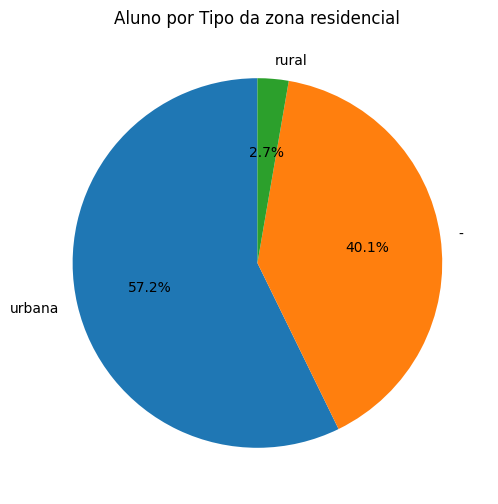

In [ ]:
grafico_pizza_com_uma_coluna('Tipo_da_zona_residencial','Aluno por Tipo da zona residencial')

In [ ]:
df_copia_zona = df.copy()
df_copia_zona.rename(columns = {'Tipo da zona residencial':'Zona'}, inplace = True)

In [ ]:
df_sem_traco = df[df.Tipo_da_zona_residencial!='-']
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']

fig = px.pie(df_sem_traco, values=df_sem_traco['Tipo_da_zona_residencial'].value_counts(), names=df_sem_traco['Tipo_da_zona_residencial'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Aluno por Tipo da zona residencial, sem os não declarados nos cursos de TIC')

fig.update_traces(textfont_size=16)
fig.show()

### **Alunos por Naturalidade**

In [ ]:
df_sem_traco = df[df.Naturalidade!='-']
cidades = df_sem_traco['Naturalidade'].value_counts().to_list()

##################################################
#Filtrando as 10 cidades com mais alunos do curso
lista_top10_cidades_values = []
lista_top10_cidades_values_nomes = []

for i in range(9):
  lista_top10_cidades_values.append(cidades[i])


nomes = df_sem_traco['Naturalidade'].value_counts().index

for i in range(9):
  lista_top10_cidades_values_nomes.append(nomes[i])
####################################################

fig = px.bar(x=lista_top10_cidades_values_nomes,y=lista_top10_cidades_values,title='Top 10 Naturalidades dos Alunos dos cursos de TIC')
fig.show()


In [ ]:
df_sem_traco = df[df.Naturalidade!='-']
naturalidade = df_sem_traco['Naturalidade'].value_counts()
porcentagem = naturalidade.apply((lambda x: (x*100)/naturalidade.sum()))

fig = px.bar(naturalidade.head(10),title='Top 10 Naturalidades dos Alunos dos cursos de TIC',text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))])
fig.show()

### **Alunos por Bairro**

In [ ]:
df_sem_traco = df[df.Bairro!='-']
bairros = df_sem_traco['Bairro'].value_counts().to_list()

##################################################
#Filtrando as 10 bairro com mais alunos do curso
lista_top10_bairros_values = []
lista_top10_bairros_values_nomes = []

for i in range(9):
  lista_top10_bairros_values.append(bairros[i])


nomes = df_sem_traco['Bairro'].value_counts().index

for i in range(9):
  lista_top10_bairros_values_nomes.append(nomes[i])
####################################################

fig = px.bar(x=lista_top10_bairros_values_nomes,y=lista_top10_bairros_values,title='Top 10 Bairros dos Alunos dos cursos de TIC')
fig.show()

### **Alunos por Cota SISTEC**

In [ ]:
df_sem_traco = df[df.Cota_SISTEC!='-']
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']

fig = px.pie(df_sem_traco, values=df_sem_traco['Cota_SISTEC'].value_counts(), names=df_sem_traco['Cota_SISTEC'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Aluno por Cota SISTEC, sem os não declarados nos cursos de TIC')

fig.update_traces(textfont_size=16)
fig.show()

### **Alunos por Faixa de renda (SISTEC)**

In [ ]:
valor_absoluto = df['Faixa_de_renda_(SISTEC)'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df['Faixa_de_renda_(SISTEC)'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(porcentagem,
             orientation='h',text=[i+'   ' + str('{:,.2f}'.format(j)) +' %' for i,j in zip(valor_absoluto.index,porcentagem)],color_discrete_sequence=[colors],
            )
fig.update_layout(width = 950, height = 500, plot_bgcolor = 'white',
                  margin = dict(t=10, l=10, r=0, b=10),
                  yaxis={'categoryorder':'total descending'},
                  legend=dict(title='Aluno por Faixa de renda (SISTEC)'),
                  showlegend=True
                 )
fig.update_traces(textposition='auto')
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

In [ ]:
df.rename(columns = {'Faixa_de_renda_(SISTEC)':'Faixa_de_renda'}, inplace = True)
df_declarados = df[df.Faixa_de_renda!='nao declarado']
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']

fig = px.pie(df_declarados, values=df_declarados['Faixa_de_renda'].value_counts(), names=df_declarados['Faixa_de_renda'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Aluno por faixa de Renda sem os não declarados')

fig.update_traces(textfont_size=16)
fig.show()

### **Alunos por Forma de ingresso**

In [ ]:
valor_absoluto = df['Forma_de_ingresso'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df['Forma_de_ingresso'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(porcentagem,
             orientation='h',text=[i+'   ' + str('{:,.2f}'.format(j)) +' %' for i,j in zip(valor_absoluto.index,porcentagem)],color_discrete_sequence=[colors],
            )
fig.update_layout(width = 950, height = 500, plot_bgcolor = 'white',
                  margin = dict(t=10, l=10, r=0, b=10),
                  yaxis={'categoryorder':'total descending'},
                  legend=dict(title='Aluno por Forma de ingresso'),
                  showlegend=True
                 )
fig.update_traces(textposition='auto')
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

### **Alunos por Coeficiente de progressao**

In [ ]:
tabela = descreve_informacoes(df)
tabela

<ipython-input-37-ac5585b1a11b>:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-37-ac5585b1a11b>:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-37-ac5585b1a11b>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-37-ac5585b1a11b>:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Coeficiente_de_progressao
Quantidade,1278.0
Média,30.962801
Desvio padrão,33.360909
Valor mínimo,0.0
Q1,0.0
Q2/Mediana,18.43
Q3,47.1125
Valor máximo,100.0
Moda,"(0.0,)"
Variância,1112.95027


### **Alunos por idade**

In [ ]:
df_idade_matriculados = df[df.Situacao.isin(['matriculado',  'intercambio', 'vinculado'])]
idade_17_20 = len(df_idade_matriculados[df_idade_matriculados.Idade<20])
idade_20_25 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=20) & (df_idade_matriculados.Idade<25)])
idade_25_30 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=25) & (df_idade_matriculados.Idade<30)])
idade_30_35 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=30) & (df_idade_matriculados.Idade<35)])
idade_35_40 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=35) & (df_idade_matriculados.Idade<40)])
idade_40_45 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=40) & (df_idade_matriculados.Idade<45)])
idade_45_50 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=45) & (df_idade_matriculados.Idade<50)])


colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(x=['17-20','20-25','25-30','30-35','35-40','40-45','45-50'],y=[idade_17_20,idade_20_25,idade_25_30,idade_30_35,idade_35_40,idade_40_45,idade_45_50],title='Faixa de Idade dos matriculados',color_discrete_sequence=[colors])
fig.update_layout(yaxis={'title':'Quantidade de Alunos pela Idade'},
                   xaxis={'title': 'Idade'})

fig.show()

## **Perfil geral dos alunos Engenharia(Sem filtro de situação)**


### **Quantidade Total de Alunos**


In [ ]:
df_situacao_geral = df_engenharia['Situacao'].value_counts().to_frame()
df_situacao_geral.rename(columns={'Situacao': 'Value'})

,Value
matriculado,427
cancelado voluntariamente,72
cancelado compulsoriamente,43
trancado,36
formado,34
evadido,26
vinculado,7
intercambio,6
afastado,4


In [ ]:
total_alunos = df_situacao_geral['Situacao'].sum()

In [ ]:
fig = go.Figure()
fig = go.Figure(go.Indicator(
    mode = "number",
    value = total_alunos,))
fig.update_layout(
    template = {'data' : {'indicator': [{
        'title': {'text': "TOTAL DE ALUNOS DE ENGENHARIA"},}]
                         }})
fig.show()

### **Aluno por Situação**

In [ ]:
valor_absoluto = df_engenharia['Situacao'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_engenharia['Situacao'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(porcentagem,
             orientation='h',text=[i+' ' + str('{:,.2f}'.format(j)) +' %' for i,j in zip(valor_absoluto.index,porcentagem)],color_discrete_sequence=[colors],
            )
fig.update_layout(width = 950, height = 500, plot_bgcolor = 'white',
                  margin = dict(t=10, l=10, r=0, b=10),
                  yaxis={'categoryorder':'total descending'},
                  legend=dict(title='Situação dos Alunos de Engenharia'),
                  showlegend=True
                 )
fig.update_traces(textposition='auto')
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

In [ ]:
df_situacao_geral.insert(1, "Porcentagem", porcentagem.value_counts().index, True)

In [ ]:
fig = px.bar(df_situacao_geral,x=df_situacao_geral.index,y='Situacao',title='Quantidade de alunos por todas as situações',text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem)])
fig.update_layout(yaxis={'title':'Quantidade de Alunos'},
                   xaxis={'title': 'Situacao'})
fig.show()

### **Alunos por Sexo**

In [ ]:
colors = ['#33e0ff','#ff33dd']
fig = px.pie(df_engenharia, values=df_engenharia['Sexo'].value_counts(), names=df_engenharia['Sexo'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_traces(textposition='outside', textinfo='percent+label',
                  hole=.6, hoverinfo="label+percent+name",title='Alunos por Sexo')
fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [ ]:
df_filtrado = df_engenharia[df_engenharia.Situacao.isin(['formado'])]
colors = ['#33e0ff','#ff33dd']
fig = px.pie(df_filtrado, values=df_filtrado['Sexo'].value_counts(), names=df_filtrado['Sexo'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_traces(textposition='outside', textinfo='percent+label',
                  hole=.6, hoverinfo="label+percent+name",title='Alunos formados por Sexo')
fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [ ]:
df_filtrado = df_engenharia[df_engenharia.Situacao.isin(['matriculado'])]
colors = ['#33e0ff','#ff33dd']
fig = px.pie(df_filtrado, values=df_filtrado['Sexo'].value_counts(), names=df_filtrado['Sexo'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_traces(textposition='outside', textinfo='percent+label',
                  hole=.6, hoverinfo="label+percent+name",title='Alunos matriculados por Sexo')
fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

### **Alunos por Cor/Raça**

In [ ]:
valor_absoluto = df_engenharia['Cor_Raca'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_engenharia['Cor_Raca'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(porcentagem,title='Aluno por Cor/Raca em Engenharia',
             orientation='h',text=[i+' ' + str('{:,.2f}'.format(j)) +' %' for i,j in zip(valor_absoluto.index,porcentagem)],color_discrete_sequence=[colors],
            )
fig.update_layout(width = 950, height = 500, plot_bgcolor = 'white',
                  margin = dict(t=35, l=10, r=0, b=10),showlegend=False)
fig.update_traces(textposition='auto')
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

### **Alunos por Tipo da escola anterior**

In [ ]:
df_sem_traco = df_engenharia[df_engenharia.Tipo_da_escola_anterior!='-']
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']

fig = px.pie(df_sem_traco, values=df_sem_traco['Tipo_da_escola_anterior'].value_counts(), names=df_sem_traco['Tipo_da_escola_anterior'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Aluno por Tipo da escola anterior em Engenharia')

fig.update_traces(textfont_size=16)
fig.show()

### **Alunos por Tipo da zona residencial**

In [ ]:
df_sem_traco = df_engenharia[df_engenharia.Tipo_da_zona_residencial!='-']
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']

fig = px.pie(df_sem_traco, values=df_sem_traco['Tipo_da_zona_residencial'].value_counts(), names=df_sem_traco['Tipo_da_zona_residencial'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Aluno por Tipo da zona residencial de Engenharia')

fig.update_traces(textfont_size=16)
fig.show()

### **Alunos por Naturalidade**

In [ ]:
df_sem_traco = df_engenharia[df_engenharia.Naturalidade!='-']
cidades = df_sem_traco['Naturalidade'].value_counts().to_list()

##################################################
#Filtrando as 10 cidades com mais alunos do curso
lista_top10_cidades_values = []
lista_top10_cidades_values_nomes = []

for i in range(9):
  lista_top10_cidades_values.append(cidades[i])


nomes = df_sem_traco['Naturalidade'].value_counts().index

for i in range(9):
  lista_top10_cidades_values_nomes.append(nomes[i])
####################################################

fig = px.bar(x=lista_top10_cidades_values_nomes,y=lista_top10_cidades_values,title='Top 10 Naturalidades dos Alunos de Engenharia')
fig.show()


### **Alunos por Bairro**

In [ ]:
df_sem_traco = df_engenharia[df_engenharia.Bairro!='-']
bairros = df_sem_traco['Bairro'].value_counts().to_list()

##################################################
#Filtrando as 10 bairro com mais alunos do curso
lista_top10_bairros_values = []
lista_top10_bairros_values_nomes = []

for i in range(9):
  lista_top10_bairros_values.append(bairros[i])


nomes = df_sem_traco['Bairro'].value_counts().index

for i in range(9):
  lista_top10_bairros_values_nomes.append(nomes[i])
####################################################

fig = px.bar(x=lista_top10_bairros_values_nomes,y=lista_top10_bairros_values,title='Top 10 Bairros dos Alunos de Engenharia')
fig.show()

### **Alunos por Coeficiente de progressao**

In [ ]:
tabela = descreve_informacoes(df_engenharia)
tabela

<ipython-input-47-ac5585b1a11b>:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-47-ac5585b1a11b>:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-47-ac5585b1a11b>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-47-ac5585b1a11b>:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Coeficiente_de_progressao
Quantidade,655.0
Média,32.288504
Desvio padrão,32.830531
Valor mínimo,0.0
Q1,4.58
Q2/Mediana,21.19
Q3,49.415
Valor máximo,100.0
Moda,"(0.0,)"
Variância,1077.843765


### **Alunos por Cota SISTEC**

In [ ]:
df_sem_traco = df_engenharia[df_engenharia.Cota_SISTEC!='-']
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']

fig = px.pie(df_sem_traco, values=df_sem_traco['Cota_SISTEC'].value_counts(), names=df_sem_traco['Cota_SISTEC'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Aluno por Cota SISTEC de Engenharia')

fig.update_traces(textfont_size=16)
fig.show()

### **Alunos por Faixa de renda (SISTEC)**

In [ ]:
valor_absoluto = df_engenharia['Faixa_de_renda_(SISTEC)'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_engenharia['Faixa_de_renda_(SISTEC)'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(porcentagem,
             orientation='h',text=[i+'   ' + str('{:,.2f}'.format(j)) +' %' for i,j in zip(valor_absoluto.index,porcentagem)],color_discrete_sequence=[colors],
            )
fig.update_layout(width = 950, height = 500, plot_bgcolor = 'white',
                  margin = dict(t=10, l=10, r=0, b=10),
                  yaxis={'categoryorder':'total descending'},
                  legend=dict(title='Aluno por Faixa de renda (SISTEC)'),
                  showlegend=True
                 )
fig.update_traces(textposition='auto')
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

### **Alunos por Forma de ingresso**

In [ ]:
valor_absoluto = df_engenharia['Forma_de_ingresso'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_engenharia['Forma_de_ingresso'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(porcentagem,
             orientation='h',text=[i+'   ' + str('{:,.2f}'.format(j)) +' %' for i,j in zip(valor_absoluto.index,porcentagem)],color_discrete_sequence=[colors],
            )
fig.update_layout(width = 950, height = 500, plot_bgcolor = 'white',
                  margin = dict(t=10, l=10, r=0, b=10),
                  yaxis={'categoryorder':'total descending'},
                  legend=dict(title='Aluno por Forma de ingresso'),
                  showlegend=True
                 )
fig.update_traces(textposition='auto')
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

### **Alunos por idade**

**Idade Matriculados**

In [ ]:
df_formata_idade = df_engenharia.copy()
df_formata_idade = df_formata_idade[df_formata_idade.Situacao.isin(['matriculado'])]
df_formata_idade.loc[:,'Idade'] = df_formata_idade['Idade'].astype(str)
df_idade = df_formata_idade['Idade'].value_counts().to_frame()
df_idade = df_idade.rename(columns={'Idade': 'Quantidade'})
df_idade = df_idade



colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361','#FF4500','#FF7F50','#FFA500','#D2691E ','#F4A460','#DAA520','#FFD700','#FFFF00','#6B8E23','#228B22','#9ACD32','#ADFF2F','#00FA9A','#8FBC8F','#ADD8E6','#D3D3D3','#778899','#696969','#2F4F4F']
fig14 = px.bar(df_idade,x=df_idade.index,y='Quantidade',title='Idade dos Alunos matriculados - Engenharia',color_discrete_sequence=[colors])
fig14.update_layout(yaxis={'title':'Quantidade de Alunos pela Idade'},
                   xaxis={'title': 'Idade'})

In [ ]:
df_idade_matriculados = df_engenharia[df_engenharia.Situacao.isin(['matriculado',  'intercambio', 'vinculado'])]
idade_17_20 = len(df_idade_matriculados[df_idade_matriculados.Idade<20])
idade_20_25 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=20) & (df_idade_matriculados.Idade<25)])
idade_25_30 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=25) & (df_idade_matriculados.Idade<30)])
idade_30_35 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=30) & (df_idade_matriculados.Idade<35)])
idade_35_40 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=35) & (df_idade_matriculados.Idade<40)])
idade_40_45 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=40) & (df_idade_matriculados.Idade<45)])
idade_45_50 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=45) & (df_idade_matriculados.Idade<50)])

lista_quantidade_idades = [idade_17_20,idade_20_25,idade_25_30,idade_30_35,idade_35_40,idade_40_45,idade_45_50]

porcentagem = []

for i in lista_quantidade_idades:
  p = (i*100)/sum(lista_quantidade_idades)
  porcentagem.append(p)

colors = ['#6495ED']
fig = px.bar(x=['15-20','20-25','25-30','30-35','35-40','40-45','45-50'],y=[idade_17_20,idade_20_25,idade_25_30,idade_30_35,idade_35_40,idade_40_45,idade_45_50],title='Faixa de Idade dos matriculados',color_discrete_sequence=colors,text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem)])
fig.update_layout(yaxis={'title':'Quantidade de Alunos pela Idade'},
                   xaxis={'title': 'Idade'})

fig.show()

## **Perfil geral dos alunos Telemática(Sem filtro de situação)**


### **Quantidade Total de Alunos**


In [ ]:
df_situacao_geral = df_telematica['Situacao'].value_counts().to_frame()
df_situacao_geral.rename(columns={'Situacao': 'Value'})

,Value
evadido,588
cancelado voluntariamente,236
matriculado,225
formado,135
cancelado compulsoriamente,72
trancado,41
trancado voluntariamente,24
intercambio,5
transferido internamente,4
transferido externamente,3


In [ ]:
total_alunos = df_situacao_geral['Situacao'].sum()

In [ ]:
fig = go.Figure()
fig = go.Figure(go.Indicator(
    mode = "number",
    value = total_alunos,))
fig.update_layout(
    template = {'data' : {'indicator': [{
        'title': {'text': "TOTAL DE ALUNOS DE TELEMÁTICA"},}]
                         }})
fig.show()

### **Aluno por Situação**

In [ ]:
valor_absoluto = df_telematica['Situacao'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_telematica['Situacao'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(porcentagem,
             orientation='h',text=[i+' ' + str('{:,.2f}'.format(j)) +' %' for i,j in zip(valor_absoluto.index,porcentagem)],color_discrete_sequence=[colors],
            )
fig.update_layout(width = 950, height = 500, plot_bgcolor = 'white',
                  margin = dict(t=10, l=10, r=0, b=10),
                  yaxis={'categoryorder':'total descending'},
                  legend=dict(title='Situação dos Alunos de Telemática'),
                  showlegend=True
                 )
fig.update_traces(textposition='auto')
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

In [ ]:
fig = px.bar(df_situacao_geral,x=df_situacao_geral.index,y='Situacao',title='Quantidade de alunos por todas as situações',text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem)])
fig.update_layout(yaxis={'title':'Quantidade de Alunos'},
                   xaxis={'title': 'Situacao'})
fig.show()

### **Alunos por Sexo**

In [ ]:
colors = ['#33e0ff','#ff33dd']
fig = px.pie(df_telematica, values=df_telematica['Sexo'].value_counts(), names=df_telematica['Sexo'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_traces(textposition='outside', textinfo='percent+label',
                  hole=.6, hoverinfo="label+percent+name",title='Alunos por Sexo')
fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

### **Alunos por Cor/Raça**

In [ ]:
valor_absoluto = df_telematica['Cor_Raca'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_telematica['Cor_Raca'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto,title='Aluno por Cor/Raca em Telemática',
             orientation='h',text=[i+' ' + str('{:,.2f}'.format(j)) +' %' for i,j in zip(valor_absoluto.index,porcentagem)],color_discrete_sequence=[colors],
            )
fig.update_layout(width = 950, height = 500, plot_bgcolor = 'white',
                  margin = dict(t=35, l=10, r=0, b=10),showlegend=False)
fig.update_traces(textposition='auto')
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

### **Alunos por Tipo da escola anterior**

In [ ]:
df_sem_traco = df_telematica[df_telematica.Tipo_da_escola_anterior!='-']
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']

fig = px.pie(df_sem_traco, values=df_sem_traco['Tipo_da_escola_anterior'].value_counts(), names=df_sem_traco['Tipo_da_escola_anterior'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Aluno por Tipo da escola anterior em Telemática')

fig.update_traces(textfont_size=16)
fig.show()

In [ ]:
df_filtrado = df_telematica_novo[df_telematica_novo.Ano_de_ingresso<=2012]
df_sem_traco = df_filtrado[df_filtrado.Tipo_da_escola_anterior!='-']

colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']

fig = px.pie(df_sem_traco, values=df_sem_traco['Tipo_da_escola_anterior'].value_counts(), names=df_sem_traco['Tipo_da_escola_anterior'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Aluno por Tipo da escola anterior em Telemática até 2012')

fig.update_traces(textfont_size=16)
fig.show()

In [ ]:
df_filtrado = df_telematica_novo[df_telematica_novo.Ano_de_ingresso>2012]
df_sem_traco = df_filtrado[df_filtrado.Tipo_da_escola_anterior!='-']

colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']

fig = px.pie(df_sem_traco, values=df_sem_traco['Tipo_da_escola_anterior'].value_counts(), names=df_sem_traco['Tipo_da_escola_anterior'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Aluno por Tipo da escola anterior em Telemática depois de 2012')

fig.update_traces(textfont_size=16)
fig.show()

### **Alunos por Tipo da zona residencial**

In [ ]:
df_sem_traco = df_telematica[df_telematica.Tipo_da_zona_residencial!='-']
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']

fig = px.pie(df_sem_traco, values=df_sem_traco['Tipo_da_zona_residencial'].value_counts(), names=df_sem_traco['Tipo_da_zona_residencial'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Aluno por Tipo da zona residencial de Telemática')

fig.update_traces(textfont_size=16)
fig.show()

### **Alunos por Naturalidade**

In [ ]:
df_sem_traco = df_telematica[df_telematica.Naturalidade!='-']
cidades = df_sem_traco['Naturalidade'].value_counts().to_list()

##################################################
#Filtrando as 10 cidades com mais alunos do curso
lista_top10_cidades_values = []
lista_top10_cidades_values_nomes = []

for i in range(9):
  lista_top10_cidades_values.append(cidades[i])


nomes = df_sem_traco['Naturalidade'].value_counts().index

for i in range(9):
  lista_top10_cidades_values_nomes.append(nomes[i])
####################################################

fig = px.bar(x=lista_top10_cidades_values_nomes,y=lista_top10_cidades_values,title='Top 10 Naturalidades dos Alunos de Telemática')
fig.show()


### **Alunos por Bairro**

In [ ]:
df_sem_traco = df_telematica[df_telematica.Bairro!='-']
bairros = df_sem_traco['Bairro'].value_counts().to_list()

##################################################
#Filtrando as 10 bairro com mais alunos do curso
lista_top10_bairros_values = []
lista_top10_bairros_values_nomes = []

for i in range(9):
  lista_top10_bairros_values.append(bairros[i])


nomes = df_sem_traco['Bairro'].value_counts().index

for i in range(9):
  lista_top10_bairros_values_nomes.append(nomes[i])
####################################################

fig = px.bar(x=lista_top10_bairros_values_nomes,y=lista_top10_bairros_values,title='Top 10 Bairros dos Alunos de Telemática')
fig.show()

### **Alunos por Coeficiente de progressao**

In [ ]:
tabela = descreve_informacoes(df_telematica)
tabela

<ipython-input-47-ac5585b1a11b>:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-47-ac5585b1a11b>:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-47-ac5585b1a11b>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-47-ac5585b1a11b>:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Coeficiente_de_progressao
Quantidade,623.0
Média,29.569005
Desvio padrão,33.880019
Valor mínimo,0.0
Q1,0.0
Q2/Mediana,15.54
Q3,46.71
Valor máximo,100.0
Moda,"(0.0,)"
Variância,1147.855684


### **Alunos por Cota SISTEC**

In [ ]:
df_sem_traco = df_telematica[df_telematica.Cota_SISTEC!='-']
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']

fig = px.pie(df_sem_traco, values=df_sem_traco['Cota_SISTEC'].value_counts(), names=df_sem_traco['Cota_SISTEC'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Aluno por Cota SISTEC de Telemática')

fig.update_traces(textfont_size=16)
fig.show()

### **Alunos por Faixa de renda (SISTEC)**

In [ ]:
valor_absoluto = df_telematica['Faixa_de_renda_(SISTEC)'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_telematica['Faixa_de_renda_(SISTEC)'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(valor_absoluto,
             orientation='h',text=[i+'   ' + str('{:,.2f}'.format(j)) +' %' for i,j in zip(valor_absoluto.index,porcentagem)],color_discrete_sequence=[colors],
            )
fig.update_layout(width = 950, height = 500, plot_bgcolor = 'white',
                  margin = dict(t=10, l=10, r=0, b=10),
                  yaxis={'categoryorder':'total descending'},
                  legend=dict(title='Aluno por Faixa de renda (SISTEC)'),
                  showlegend=True
                 )
fig.update_traces(textposition='auto')
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

### **Alunos por Forma de ingresso**

In [ ]:
valor_absoluto = df_telematica['Forma_de_ingresso'].value_counts()
porcentagem = valor_absoluto.apply((lambda x: (x*100)/df_telematica['Forma_de_ingresso'].value_counts().sum()))
colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig = px.bar(porcentagem,
             orientation='h',text=[i+'   ' + str('{:,.2f}'.format(j)) +' %' for i,j in zip(valor_absoluto.index,porcentagem)],color_discrete_sequence=[colors],
            )
fig.update_layout(width = 950, height = 500, plot_bgcolor = 'white',
                  margin = dict(t=10, l=10, r=0, b=10),
                  yaxis={'categoryorder':'total descending'},
                  legend=dict(title='Aluno por Forma de ingresso'),
                  showlegend=True
                 )
fig.update_traces(textposition='auto')
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

### **Alunos por idade**

In [ ]:
df_formata_idade = df_telematica.copy()
df_formata_idade.loc[:,'Idade'] = df_formata_idade['Idade'].astype(str)
df_idade = df_formata_idade['Idade'].value_counts().to_frame()
df_idade = df_idade.rename(columns={'Idade': 'Quantidade'})
df_idade = df_idade.head(10)



colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361']
fig14 = px.bar(df_idade,x=df_idade.index,y='Quantidade',title='Aluno por idade - Telemática',color_discrete_sequence=[colors])
fig14.update_layout(yaxis={'title':'Quantidade de Alunos pela Idade'},
                   xaxis={'title': 'Idade'})

**Idade Matricualdos**

In [ ]:
df_formata_idade = df_telematica.copy()
df_formata_idade = df_formata_idade[df_formata_idade.Situacao.isin(['matriculado'])]
df_formata_idade.loc[:,'Idade'] = df_formata_idade['Idade'].astype(str)
df_idade = df_formata_idade['Idade'].value_counts().to_frame()
df_idade = df_idade.rename(columns={'Idade': 'Quantidade'})
df_idade = df_idade



colors = colors = ['#33e0ff','#338aff','#3342ff','#6e33ff','#bb33ff','#d133ff','#e033ff','#ff33fc','#ff33dd','#ff33af','#ff3383','#ff3361','#FF4500','#FF7F50','#FFA500','#D2691E ','#F4A460','#DAA520','#FFD700','#FFFF00','#6B8E23','#228B22','#9ACD32','#ADFF2F','#00FA9A','#8FBC8F','#ADD8E6','#D3D3D3','#778899','#696969','#2F4F4F']
fig14 = px.bar(df_idade,x=df_idade.index,y='Quantidade',title='Idade dos Alunos matriculados - Telemática',color_discrete_sequence=[colors])
fig14.update_layout(yaxis={'title':'Quantidade de Alunos pela Idade'},
                   xaxis={'title': 'Idade'})

In [ ]:
df_idade_matriculados = df_telematica[df_telematica.Situacao.isin(['matriculado',  'intercambio', 'vinculado'])]
idade_17_20 = len(df_idade_matriculados[df_idade_matriculados.Idade<20])
idade_20_25 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=20) & (df_idade_matriculados.Idade<25)])
idade_25_30 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=25) & (df_idade_matriculados.Idade<30)])
idade_30_35 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=30) & (df_idade_matriculados.Idade<35)])
idade_35_40 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=35) & (df_idade_matriculados.Idade<40)])
idade_40_45 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=40) & (df_idade_matriculados.Idade<45)])
idade_45_50 = len(df_idade_matriculados[(df_idade_matriculados.Idade>=45) & (df_idade_matriculados.Idade<50)])


lista_quantidade_idades = [idade_17_20,idade_20_25,idade_25_30,idade_30_35,idade_35_40,idade_40_45,idade_45_50]

porcentagem = []

for i in lista_quantidade_idades:
  p = (i*100)/sum(lista_quantidade_idades)
  porcentagem.append(p)

colors = ['#6495ED']
fig = px.bar(x=['15-20','20-25','25-30','30-35','35-40','40-45','45-50'],y=[idade_17_20,idade_20_25,idade_25_30,idade_30_35,idade_35_40,idade_40_45,idade_45_50],title='Faixa de Idade dos matriculados',color_discrete_sequence=colors,text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem)])
fig.update_layout(yaxis={'title':'Quantidade de Alunos pela Idade'},
                   xaxis={'title': 'Idade'})

fig.show()

## **Perfil dos alunos de Engenharia(Com filtro de situação)**

In [ ]:
df_agrupado_engenharia = df_engenharia.copy()
df_agrupado_engenharia['Situacao'] = df_agrupado_engenharia['Situacao'].replace( ['cancelado voluntariamente', 'cancelado compulsoriamente', 'evadido','transferido externamente', 'transferido internamente'], 'evadido')
df_agrupado_engenharia['Situacao'] = df_agrupado_engenharia['Situacao'].replace( ['matriculado',  'intercambio', 'vinculado','trancado','trancado voluntariamente','afastado'], 'matriculado')
df_agrupado_engenharia['Situacao'].unique()

array(['evadido', 'matriculado', 'formado'], dtype=object)

### **Situação Geral**

In [ ]:
df_situacao_geral_eng = df_agrupado_engenharia['Situacao'].value_counts().to_frame()
colors = ['#6495ED','#FF6347','#9ACD32']

valor_absoluto1 = df_agrupado_engenharia['Situacao'].value_counts()

porcentagem1 = valor_absoluto1.apply((lambda x: (x*100)/valor_absoluto1.sum()))

fig = px.bar(df_situacao_geral_eng,x=df_situacao_geral_eng.index,y='Situacao',title='Alunos de Engenharia x Situação',text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem1)],color_discrete_sequence=[colors])
fig.update_layout(yaxis={'title':'Quantidade de Alunos'},
                   xaxis={'title': 'Situacao'})
fig.show()

### **Situação X Sexo**

In [ ]:
counts1 = df_agrupado_engenharia.groupby(['Sexo','Situacao']).size()
counts1 = counts1.unstack(level=-1)

totals1 = counts1.sum(axis=1)
percentages1 = counts1.divide(totals1, axis=0)*100

colors = ['#FF6347','#9ACD32','#6495ED']

fig = px.bar(percentages1,barmode = 'stack',color='Situacao', title='Situação dos alunos por Sexo',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Situacao'})
fig.show()

In [ ]:
counts1 = df_agrupado_engenharia.groupby(['Sexo','Situacao']).size()
counts1 = counts1.unstack(level=-1)

totals1 = counts1.sum(axis=1)
percentages1 = counts1.divide(totals1, axis=0)*100

colors = ['#FF6347','#9ACD32','#6495ED']

fig = px.bar(counts1,barmode = 'stack',color='Situacao', title='Situação dos alunos por Sexo',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Situacao'})
fig.show()

### **Situação X Naturalidade**

In [ ]:
df_sem_traco1 = df_agrupado_engenharia[df_agrupado_engenharia.Naturalidade!='-']
counts2 = df_sem_traco1.groupby(['Naturalidade','Situacao']).size()
counts2 = counts2.unstack(level=-1)

soma2 = counts2.sum(axis=1)
counts2.insert(3, "Total", soma2, True)
counts2=counts2.sort_values(by="Total", ascending=False)
counts2=counts2.drop(columns=['Total'])
counts2=counts2.head(10)

totals2 = counts2.sum(axis=1)
percentages2 = counts2.divide(totals2, axis=0)*100

colors = ['#FF6347','#9ACD32','#6495ED']

fig = px.bar(percentages2,barmode = 'stack',color='Situacao', title='Situação dos alunos por top 10 naturalidades',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Situacao'})
fig.show()

### **Situação X Bairro**

In [ ]:
df_sem_traco2 = df_agrupado_engenharia[df_agrupado_engenharia.Bairro!='-']
counts3 = df_sem_traco2.groupby(['Bairro','Situacao']).size()
counts3 = counts3.unstack(level=-1)

soma3 = counts3.sum(axis=1)
counts3.insert(3, "Total", soma3, True)
counts3=counts3.sort_values(by="Total", ascending=False)
counts3=counts3.drop(columns=['Total'])
counts3=counts3.head(10)

totals3 = counts3.sum(axis=1)
percentages3 = counts3.divide(totals3, axis=0)*100

colors = ['#FF6347','#9ACD32','#6495ED']

fig = px.bar(percentages3,barmode = 'stack',color='Situacao', title='Situação dos alunos por top 10 bairros',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Situacao'})
fig.show()

### **Situação x Zona Residencial**

In [ ]:
df_sem_traco3 = df_agrupado_engenharia[df_agrupado_engenharia.Tipo_da_zona_residencial!='-']

counts4 = df_sem_traco3.groupby(['Tipo_da_zona_residencial','Situacao']).size()
counts4 = counts4.unstack(level=-1)

totals4 = counts4.sum(axis=1)
percentages4 = counts4.divide(totals4, axis=0)*100

colors = ['#FF6347','#9ACD32','#6495ED']

fig = px.bar(percentages4,barmode = 'stack',color='Situacao', title='Situação dos alunos por Tipo da zona residencial',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Situacao'})
fig.show()

### **Situação x Forma de ingresso**

In [ ]:
counts5 = df_agrupado_engenharia.groupby(['Forma_de_ingresso','Situacao']).size()
counts5 = counts5.unstack(level=-1)

totals5 = counts5.sum(axis=1)
percentages5 = counts5.divide(totals5, axis=0)*100

colors = ['#FF6347','#9ACD32','#6495ED']

fig = px.bar(percentages5,barmode = 'stack',color='Situacao', title='Situação dos alunos por Forma de ingresso',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Forma de Ingresso'})
fig.show()

### **Situação x Cor/Raça**

In [ ]:
counts6 = df_agrupado_engenharia.groupby(['Cor_Raca','Situacao']).size()
counts6 = counts6.unstack(level=-1)

totals6 = counts6.sum(axis=1)
percentages6 = counts6.divide(totals6, axis=0)*100

colors = ['#FF6347','#9ACD32','#6495ED']

fig = px.bar(percentages6,barmode = 'stack',color='Situacao', title='Situação dos alunos por Cor/Raça',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Cor/Raca'})
fig.show()

### **Situação x Tipo da escola anterior**

In [ ]:
df_sem_traco3 = df_agrupado_engenharia[df_agrupado_engenharia.Tipo_da_escola_anterior!='-']
counts7 = df_sem_traco3.groupby(['Tipo_da_escola_anterior','Situacao']).size()
counts7 = counts7.unstack(level=-1)

totals7 = counts7.sum(axis=1)
percentages7 = counts7.divide(totals7, axis=0)*100

colors = ['#FF6347','#9ACD32','#6495ED']

fig = px.bar(percentages7,barmode = 'stack',color='Situacao', title='Situação dos alunos por Tipo da escola anterior',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Tipo da escola anterior'})
fig.show()

### **Situação x Faixa de Renda**

In [ ]:
counts8 = df_agrupado_engenharia.groupby(['Faixa_de_renda_(SISTEC)','Situacao']).size()
counts8 = counts8.unstack(level=-1)

totals8 = counts8.sum(axis=1)
percentages8 = counts8.divide(totals8, axis=0)*100

colors = ['#FF6347','#9ACD32','#6495ED']

fig = px.bar(percentages8,barmode = 'stack',color='Situacao', title='Situação dos alunos por Faixa de renda (SISTEC)',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Faixa de renda (SISTEC)'})
fig.show()

### **Situação x Idade**

In [ ]:
df_idade_maior_30 = df_agrupado_engenharia[df_agrupado_engenharia.Idade>=30]
colors = ['#6495ED','#FF6347','#9ACD32']

fig = px.pie(df_idade_maior_30, values=df_idade_maior_30['Situacao'].value_counts(), names=df_idade_maior_30['Situacao'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Situação dos Alunos com idade maior que 30')

fig.update_traces(textfont_size=16)
fig.show()

In [ ]:
df_idade_menor_30 = df_agrupado_engenharia[df_agrupado_engenharia.Idade<=30]
colors = ['#6495ED','#FF6347','#9ACD32','black']

fig = px.pie(df_idade_menor_30, values=df_idade_menor_30['Situacao'].value_counts(), names=df_idade_menor_30['Situacao'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Situação dos Alunos com idade menor que 30')

fig.update_traces(textfont_size=16)
fig.show()

In [ ]:
df_formata_idade = df_agrupado_engenharia.copy()
df_formata_idade.loc[:,'Idade'] = df_formata_idade['Idade'].astype(str)

counts10 = df_formata_idade.groupby(['Idade','Situacao']).size()
counts10 = counts10.unstack(level=-1)
counts10 = counts10.head(20)

totals10 = counts10.sum(axis=1)
percentages10 = counts10.divide(totals10, axis=0)*100

colors = ['#FF6347','#9ACD32','#6495ED']

fig14 = px.bar(percentages10,barmode = 'stack',color='Situacao',title='Aluno por idade - Engenharia',color_discrete_sequence=colors)
fig14.update_layout(yaxis={'title':'Quantidade de Alunos pela Idade'},
                   xaxis={'title': 'Idade'})

### **Situação x Cota SISTEC**

In [ ]:
df_sem_traco4 = df_agrupado_engenharia[df_agrupado_engenharia.Cota_SISTEC!='-']
counts9 = df_sem_traco4.groupby(['Cota_SISTEC','Situacao']).size()
counts9 = counts9.unstack(level=-1)

totals9 = counts9.sum(axis=1)
percentages9 = counts9.divide(totals9, axis=0)*100

colors = ['#FF6347','#9ACD32','#6495ED']

fig = px.bar(percentages9,barmode = 'stack',color='Situacao', title='Situação dos alunos por Cota SISTEC',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Cota SISTEC'})
fig.show()

In [ ]:
df_sem_traco4 = df_agrupado_engenharia[df_agrupado_engenharia.Cota_SISTEC!='-']
counts9 = df_sem_traco4.groupby(['Cota_SISTEC','Situacao']).size()
counts9 = counts9.unstack(level=-1)

totals9 = counts9.sum(axis=1)
percentages9 = counts9.divide(totals9, axis=0)*100

colors = ['#FF6347','#9ACD32','#6495ED']

fig = px.bar(counts9,barmode = 'stack',color='Situacao', title='Situação dos alunos por Cota SISTEC',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Cota SISTEC'})
fig.show()

### **Situação x Coeficiente de Progressão**

In [ ]:
df_evadidos = df_agrupado_engenharia[(df_agrupado_engenharia.Situacao.isin(['evadido'])) & (df_agrupado_engenharia.Coeficiente_de_progressao!='-')]
df_matriculado = df_agrupado_engenharia[(df_agrupado_engenharia.Situacao.isin(['matriculado'])) & (df_agrupado_engenharia.Coeficiente_de_progressao!='-')]

#Evadido
df_notas_evadidos = df_evadidos['Coeficiente_de_progressao']
df_notas_evadidos =  df_notas_evadidos.astype(str).str.replace(',','.')
df_notas_evadidos = df_notas_evadidos.astype(float)
df_notas_evadidos = df_notas_evadidos.mean()

#Matriculado
df_notas_matriculados = df_matriculado['Coeficiente_de_progressao']
df_notas_matriculados =  df_notas_matriculados.astype(str).str.replace(',','.')
df_notas_matriculados = df_notas_matriculados.astype(float)
df_notas_matriculados = df_notas_matriculados.mean()


colors = ['#6495ED','#FF6347','#9ACD32']
fig = px.bar(x=['matriculado','evadido'],y=[df_notas_matriculados,df_notas_evadidos], title='Situação dos alunos pelas médias do Coeficiente de Progressão',color_discrete_sequence=[colors])
fig.update_layout(yaxis={'title':'Coeficiente de progressão'},
                   xaxis={'title': 'Situação'})
fig.show()

In [ ]:
df_evadidos = df_agrupado_engenharia[(df_agrupado_engenharia.Situacao.isin(['evadido'])) & (df_agrupado_engenharia.Coeficiente_de_progressao!='-')]
df_notas_evadidos = df_evadidos['Coeficiente_de_progressao']
df_notas_evadidos =  df_notas_evadidos.astype(str).str.replace(',','.')
df_notas_evadidos = df_notas_evadidos.astype(float)
colors = ['#FF6347']
fig = px.histogram(df_notas_evadidos,color_discrete_sequence=colors,title='Coeficiente de Progressão dos alunos evadidos')
fig.update_layout(yaxis={'title':'Quantidade de Alunos'},
                   xaxis={'title': 'Coeficiente de Progressão'},showlegend=False)
fig.show()

In [ ]:
df_evadidos = df_agrupado_engenharia[(df_agrupado_engenharia.Situacao.isin(['evadido'])) & (df_agrupado_engenharia.Coeficiente_de_progressao!='-')]
df_notas_evadidos = df_evadidos['Coeficiente_de_progressao']
pd.set_option('display.max_columns',None)
df_notas_evadidos.loc[:'Coeficiente_de_progressao'].to_list()

['0',
 '0',
 '9,23',
 '23,99',
 '8,26',
 '1,85',
 '20,28',
 '0,91',
 '4,58',
 '8,29',
 '0',
 '0',
 '15,22',
 '11,96',
 '31,61',
 '0',
 '0',
 '0',
 '18,46',
 '0',
 '0',
 '0',
 '23,99',
 '0',
 '0',
 '0',
 '8,26',
 '7,32',
 '0',
 '0,91',
 '25,81',
 '0',
 '0',
 '3,11',
 '0',
 '11,99',
 '11,96',
 '10,14',
 '6,44',
 '0',
 '25,81',
 '3,67',
 '4,56',
 '29,51',
 '3,11',
 '0',
 '43,42',
 '0',
 '5,49',
 '0',
 '14,73',
 '0',
 '0',
 '0',
 '0',
 '39,69',
 '7,85',
 '37,86',
 '24,90',
 '0',
 '0',
 '0',
 '29,51',
 '0,77',
 '3,11',
 '0',
 '37,83',
 '11,08',
 '0,91',
 '0',
 '0,91',
 '0',
 '35,07',
 '8,62',
 '2,35',
 '5,52',
 '0',
 '0',
 '9,23',
 '0',
 '0',
 '7,37',
 '0',
 '14,73',
 '0',
 '0',
 '8,29',
 '0',
 '39,69',
 '9,17',
 '0',
 '0',
 '12,90',
 '0',
 '0',
 '0',
 '6,44',
 '8,29',
 '48,97',
 '22,13',
 '9,23',
 '5,52',
 '0',
 '0',
 '0',
 '16,58',
 '30,43',
 '4,61',
 '8,29',
 '38,77',
 '3,11',
 '0',
 '11,05',
 '0',
 '0',
 '0',
 '0',
 '11,96',
 '43,42',
 '0',
 '18,90',
 '9,23',
 '98,14',
 '14,75',
 '30,45

### **Situação x Notas Seleção:**

In [ ]:
df_evadidos = df_agrupado_engenharia[df_agrupado_engenharia.Situacao.isin(['evadido/trancado'])]
df_matriculado = df_agrupado_engenharia[df_agrupado_engenharia.Situacao.isin(['matriculado'])]
df_formado = df_agrupado_engenharia[df_agrupado_engenharia.Situacao.isin(['formado'])]

#Evadido
df_notas_evadidos = df_evadidos['Notas_da_selecao'].str.split('; ', expand=True)

df_notas_evadidos.columns = ['C.N.T.', 'C.H.T.', 'L.C.T.', 'M.T.', 'RED.']
df_notas_evadidos = df_notas_evadidos.dropna()


df_notas_evadidos = df_notas_evadidos.replace(r'[a-zA-Z\.= ]+', '', regex=True)
df_notas_evadidos = df_notas_evadidos.replace(r'(?<!\d)\.(?!\d)', '', regex=True)
df_notas_evadidos = df_notas_evadidos.replace(r'.*:', '', regex=True)
df_notas_evadidos = df_notas_evadidos.astype(float).fillna(0)

df_notas_evadidos = df_notas_evadidos / 100
df_notas_evadidos = df_notas_evadidos.mean()

#Matriculado
df_notas_matriculados = df_matriculado['Notas_da_selecao'].str.split('; ', expand=True)

df_notas_matriculados.columns = ['C.N.T.', 'C.H.T.', 'L.C.T.', 'M.T.', 'RED.']
df_notas_matriculados = df_notas_matriculados.dropna()


df_notas_matriculados = df_notas_matriculados.replace(r'[a-zA-Z\.= ]+', '', regex=True)
df_notas_matriculados = df_notas_matriculados.replace(r'(?<!\d)\.(?!\d)', '', regex=True)
df_notas_matriculados = df_notas_matriculados.replace(r'.*:', '', regex=True)
df_notas_matriculados = df_notas_matriculados.astype(float).fillna(0)

df_notas_matriculados = df_notas_matriculados / 100
df_notas_matriculados = df_notas_matriculados.mean()

#Formado
df_notas_formados = df_formado['Notas_da_selecao'].str.split('; ', expand=True)

df_notas_formados.columns = ['C.N.T.', 'C.H.T.', 'L.C.T.', 'M.T.', 'RED.']
df_notas_formados = df_notas_formados.dropna()


df_notas_formados = df_notas_formados.replace(r'[a-zA-Z\.= ]+', '', regex=True)
df_notas_formados = df_notas_formados.replace(r'(?<!\d)\.(?!\d)', '', regex=True)
df_notas_formados = df_notas_formados.replace(r'.*:', '', regex=True)
df_notas_formados = df_notas_formados.astype(float).fillna(0)

df_notas_formados = df_notas_formados / 100
df_notas_formados = df_notas_formados.mean()

df_concat = pd.concat([df_notas_matriculados,df_notas_evadidos,df_notas_formados], axis=1)

df_concat.rename(columns = {0:'matriculado'}, inplace = True)
df_concat.rename(columns = {1:'evadido/trancado'}, inplace = True)
df_concat.rename(columns = {2:'formado'}, inplace = True)

colors = ['#6495ED','#FF6347','#9ACD32']
fig = px.bar(df_concat, title='Situação dos alunos por Notas de Seleção',color_discrete_sequence=colors,barmode="group")
fig.update_layout(yaxis={'title':'Notas'},
                   xaxis={'title': 'Áreas'})
fig.show()


## **Perfil dos alunos de Telemática(Com filtro de situação)**

In [ ]:
df_agrupado_telematica = df_telematica.copy()
df_agrupado_telematica['Situacao'] = df_agrupado_telematica['Situacao'].replace( ['cancelado voluntariamente', 'cancelado compulsoriamente', 'evadido','transferido externamente', 'transferido internamente'], 'evadido')
df_agrupado_telematica['Situacao'] = df_agrupado_telematica['Situacao'].replace( ['matriculado',  'intercambio', 'vinculado','trancado','trancado voluntariamente','afastado'], 'matriculado')
df_agrupado_telematica['Situacao'].unique()

array(['evadido', 'matriculado', 'formado', 'falecido'], dtype=object)

### **Situação Geral**

In [ ]:
df_situacao_geral_tel = df_agrupado_telematica['Situacao'].value_counts().to_frame()
colors = ['#FF6347','#6495ED','#9ACD32','black']

valor_absoluto1 = df_agrupado_telematica['Situacao'].value_counts()

porcentagem1 = valor_absoluto1.apply((lambda x: (x*100)/valor_absoluto1.sum()))

fig = px.bar(df_situacao_geral_tel,x=df_situacao_geral_tel.index,y='Situacao',title='Alunos de Telemática x Situação',text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem1)],color_discrete_sequence=[colors])
fig.update_layout(yaxis={'title':'Quantidade de Alunos'},
                   xaxis={'title': 'Situacao'})
fig.show()

### **Situação X Sexo**

In [ ]:
counts1 = df_agrupado_telematica.groupby(['Sexo','Situacao']).size()
counts1 = counts1.unstack(level=-1)

totals1 = counts1.sum(axis=1)
percentages1 = counts1.divide(totals1, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages1,barmode = 'stack',color='Situacao', title='Situação dos alunos por Sexo',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Situacao'})
fig.show()

### **Situação X Naturalidade**

In [ ]:
df_sem_traco1 = df_agrupado_telematica[df_agrupado_telematica.Naturalidade!='-']
counts2 = df_sem_traco1.groupby(['Naturalidade','Situacao']).size()
counts2 = counts2.unstack(level=-1)

soma2 = counts2.sum(axis=1)
counts2.insert(3, "Total", soma2, True)
counts2=counts2.sort_values(by="Total", ascending=False)
counts2=counts2.drop(columns=['Total'])
counts2=counts2.head(10)

totals2 = counts2.sum(axis=1)
percentages2 = counts2.divide(totals2, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages2,barmode = 'stack',color='Situacao', title='Situação dos alunos por top 10 naturalidades',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Situacao'})
fig.show()

### **Situação X Bairro**

In [ ]:
df_sem_traco2 = df_agrupado_telematica[df_agrupado_telematica.Bairro!='-']
counts3 = df_sem_traco2.groupby(['Bairro','Situacao']).size()
counts3 = counts3.unstack(level=-1)

soma3 = counts3.sum(axis=1)
counts3.insert(3, "Total", soma3, True)
counts3=counts3.sort_values(by="Total", ascending=False)
counts3=counts3.drop(columns=['Total'])
counts3=counts3.head(10)

totals3 = counts3.sum(axis=1)
percentages3 = counts3.divide(totals3, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages3,barmode = 'stack',color='Situacao', title='Situação dos alunos por top 10 bairros',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Situacao'})
fig.show()

### **Situação x Zona Residencial**

In [ ]:
df_sem_traco3 = df_agrupado_telematica[df_agrupado_telematica.Tipo_da_zona_residencial!='-']

counts4 = df_sem_traco3.groupby(['Tipo_da_zona_residencial','Situacao']).size()
counts4 = counts4.unstack(level=-1)

totals4 = counts4.sum(axis=1)
percentages4 = counts4.divide(totals4, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages4,barmode = 'stack',color='Situacao', title='Situação dos alunos por Tipo da zona residencial',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Situacao'})
fig.show()

### **Situação x Forma de ingresso**

In [ ]:
counts5 = df_agrupado_telematica.groupby(['Forma_de_ingresso','Situacao']).size()
counts5 = counts5.unstack(level=-1)

totals5 = counts5.sum(axis=1)
percentages5 = counts5.divide(totals5, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages5,barmode = 'stack',color='Situacao', title='Situação dos alunos por Forma de ingresso',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Forma de Ingresso'})
fig.show()

### **Situação x Cor/Raça**

In [ ]:
counts6 = df_agrupado_telematica.groupby(['Cor_Raca','Situacao']).size()
counts6 = counts6.unstack(level=-1)

totals6 = counts6.sum(axis=1)
percentages6 = counts6.divide(totals6, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages6,barmode = 'stack',color='Situacao', title='Situação dos alunos por Cor/Raça',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Cor/Raca'})
fig.show()

### **Situação x Tipo da escola anterior**

In [ ]:
df_sem_traco3 = df_agrupado_telematica[df_agrupado_telematica.Tipo_da_escola_anterior!='-']
counts7 = df_sem_traco3.groupby(['Tipo_da_escola_anterior','Situacao']).size()
counts7 = counts7.unstack(level=-1)

totals7 = counts7.sum(axis=1)
percentages7 = counts7.divide(totals7, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages7,barmode = 'stack',color='Situacao', title='Situação dos alunos por Tipo da escola anterior',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Tipo da escola anterior'})
fig.show()

### **Situação x Faixa de Renda**

In [ ]:
counts8 = df_agrupado_telematica.groupby(['Faixa_de_renda_(SISTEC)','Situacao']).size()
counts8 = counts8.unstack(level=-1)

totals8 = counts8.sum(axis=1)
percentages8 = counts8.divide(totals8, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages8,barmode = 'stack',color='Situacao', title='Situação dos alunos por Faixa de renda (SISTEC)',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Faixa de renda (SISTEC)'})
fig.show()

In [ ]:
counts8 = df_agrupado_telematica.groupby(['Faixa_de_renda_(SISTEC)','Situacao']).size()
counts8 = counts8.unstack(level=-1)

totals8 = counts8.sum(axis=1)
percentages8 = counts8.divide(totals8, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(counts8,barmode = 'stack',color='Situacao', title='Situação dos alunos por Faixa de renda (SISTEC)',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Faixa de renda (SISTEC)'})
fig.show()

### **Situação x Idade**

In [ ]:
df_idade_maior_30 = df_agrupado_telematica[df_agrupado_telematica.Idade>=30]
colors = ['#FF6347','#6495ED','#9ACD32']

fig = px.pie(df_idade_maior_30, values=df_idade_maior_30['Situacao'].value_counts(), names=df_idade_maior_30['Situacao'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Situação dos Alunos com idade maior que 30')

fig.update_traces(textfont_size=16)
fig.show()

In [ ]:
df_idade_menor_30 = df_agrupado_telematica[df_agrupado_telematica.Idade<=30]
colors = ['#FF6347','#6495ED','#9ACD32','black']

fig = px.pie(df_idade_menor_30, values=df_idade_menor_30['Situacao'].value_counts(), names=df_idade_menor_30['Situacao'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Situação dos Alunos com idade menor que 30')

fig.update_traces(textfont_size=16)
fig.show()

In [ ]:
df_formata_idade = df_agrupado_telematica.copy()
df_formata_idade.loc[:,'Idade'] = df_formata_idade['Idade'].astype(str)

counts10 = df_formata_idade.groupby(['Idade','Situacao']).size()
counts10 = counts10.unstack(level=-1)
counts10 = counts10.head(20)

totals10 = counts10.sum(axis=1)
percentages10 = counts10.divide(totals10, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig14 = px.bar(percentages10,barmode = 'stack',color='Situacao',title='Aluno por idade - Telematica',color_discrete_sequence=colors)
fig14.update_layout(yaxis={'title':'Quantidade de Alunos pela Idade'},
                   xaxis={'title': 'Idade'})

### **Situação x Cota SISTEC**

In [ ]:
#df_sem_traco4 = df_agrupado_telematica[df_agrupado_telematica.Cota_SISTEC!='-']
df_agrupado_telematica['Cota_SISTEC'] = df_agrupado_telematica['Cota_SISTEC'].replace( ['nao se aplica',  '-'], 'nao se aplica')
df_agrupado_telematica['Cota_SISTEC'].unique()
counts9 = df_agrupado_telematica.groupby(['Cota_SISTEC','Situacao']).size()
counts9 = counts9.unstack(level=-1)

totals9 = counts9.sum(axis=1)
percentages9 = counts9.divide(totals9, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages9,barmode = 'stack',color='Situacao', title='Situação dos alunos por Cota SISTEC',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Cota SISTEC'})
fig.show()

In [ ]:
df_agrupado_telematica['Cota_SISTEC'] = df_agrupado_telematica['Cota_SISTEC'].replace( ['nao se aplica',  '-'], 'nao se aplica')
df_agrupado_telematica['Cota_SISTEC'].unique()
counts9 = df_agrupado_telematica.groupby(['Cota_SISTEC','Situacao']).size()
counts9 = counts9.unstack(level=-1)

totals9 = counts9.sum(axis=1)
percentages9 = counts9.divide(totals9, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(counts9,barmode = 'stack',color='Situacao', title='Situação dos alunos por Cota SISTEC',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Cota SISTEC'})
fig.show()

### **Situação x Coeficiente de Progressão**

In [ ]:
df_evadidos = df_agrupado_telematica[(df_agrupado_telematica.Situacao.isin(['evadido'])) & (df_agrupado_telematica.Coeficiente_de_progressao!='-')]
df_matriculado = df_agrupado_telematica[(df_agrupado_telematica.Situacao.isin(['matriculado'])) & (df_agrupado_telematica.Coeficiente_de_progressao!='-')]
df_formado = df_agrupado_telematica[(df_agrupado_telematica.Situacao.isin(['formado'])) & (df_agrupado_telematica.Coeficiente_de_progressao!='-')]

#Evadido
df_notas_evadidos = df_evadidos['Coeficiente_de_progressao']
df_notas_evadidos =  df_notas_evadidos.astype(str).str.replace(',','.')
df_notas_evadidos = df_notas_evadidos.astype(float)
df_notas_evadidos = df_notas_evadidos.mean()

#Matriculado
df_notas_matriculados = df_matriculado['Coeficiente_de_progressao']
df_notas_matriculados =  df_notas_matriculados.astype(str).str.replace(',','.')
df_notas_matriculados = df_notas_matriculados.astype(float)
df_notas_matriculados = df_notas_matriculados.mean()

colors = ['#6495ED','#FF6347','#9ACD32']
fig = px.bar(x=['matriculado','evadido'],y=[df_notas_matriculados,df_notas_evadidos], title='Situação dos alunos pelas médias do Coeficiente de Progressão',color_discrete_sequence=[colors])
fig.update_layout(yaxis={'title':'Notas'},
                   xaxis={'title': 'Áreas'})
fig.show()

In [ ]:
df_evadidos = df_agrupado_telematica[(df_agrupado_telematica.Situacao.isin(['evadido'])) & (df_agrupado_telematica.Coeficiente_de_progressao!='-')]
df_notas_evadidos = df_evadidos['Coeficiente_de_progressao']
df_notas_evadidos =  df_notas_evadidos.astype(str).str.replace(',','.')
df_notas_evadidos = df_notas_evadidos.astype(float)
colors = ['#FF6347']
fig = px.histogram(df_notas_evadidos,color_discrete_sequence=colors,title='Coeficiente de Progressão dos alunos evadidos')
fig.update_layout(yaxis={'title':'Quantidade de Alunos'},
                   xaxis={'title': 'Coeficiente de Progressão'},showlegend=False)
fig.show()


In [ ]:
df_evadidos = df_agrupado_telematica[(df_agrupado_telematica.Situacao.isin(['evadido'])) & (df_agrupado_telematica.Coeficiente_de_progressao!='-')]
df_notas_evadidos = df_evadidos['Coeficiente_de_progressao'].value_counts()
porcentagem = df_notas_evadidos.apply((lambda x: (x*100)/df_notas_evadidos.sum()))
df_notas_evadidos =  df_notas_evadidos.astype(str).str.replace(',','.')
df_notas_evadidos = df_notas_evadidos.astype(float)
colors = ['#FF6347']
fig = px.bar(df_notas_evadidos,title='Quantidade de alunos por todas as situações',text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem)])
fig.update_layout(yaxis={'title':'Quantidade de Alunos'},
                   xaxis={'title': 'Situacao'})
fig.show()

In [ ]:
df_evadidos_tel = df_agrupado_telematica[(df_agrupado_telematica.Situacao.isin(['evadido'])) & (df_agrupado_telematica.Coeficiente_de_progressao!='-')]
df_notas_evadidos_tel = df_evadidos_tel['Coeficiente_de_progressao']
pd.set_option('display.max_columns',None)
df_notas_evadidos_tel.loc[:'Coeficiente_de_progressao'].to_list()

['37,20',
 '0',
 '44,96',
 '31,13',
 '37,20',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '29,45',
 '41,86',
 '0',
 '15,74',
 '0',
 '0',
 '42,94',
 '0',
 '0',
 '0',
 '6,45',
 '1,28',
 '3,10',
 '65,23',
 '11,65',
 '28,48',
 '0',
 '0',
 '7,75',
 '0',
 '0',
 '44,11',
 '41,50',
 '0',
 '71,31',
 '11,65',
 '0',
 '28,52',
 '0',
 '9,05',
 '15,54',
 '0',
 '0',
 '0',
 '15,54',
 '53,16',
 '12,40',
 '0',
 '0',
 '0',
 '15,54',
 '0',
 '6,20',
 '91,47',
 '0',
 '0',
 '46,71',
 '0',
 '15,54',
 '0',
 '0',
 '0',
 '35,01',
 '10,37',
 '2,56',
 '0',
 '51,16',
 '7,75',
 '57,09',
 '0',
 '6,45',
 '0',
 '2,56',
 '16,82',
 '27,20',
 '0',
 '43,41',
 '0',
 '38,90',
 '0',
 '0',
 '5,16',
 '15,54',
 '0',
 '43,41',
 '15,54',
 '11,65',
 '25,96',
 '27,90',
 '24,80',
 '18,15',
 '27,24',
 '7,75',
 '33,73',
 '0',
 '42,67',
 '44,03',
 '0',
 '0',
 '68,21',
 '0',
 '4,65',
 '1,28',
 '0',
 '27,90',
 '49,28',
 '27,90',
 '15,54',
 '41,86',
 '0',
 '6,45',
 '20,75',
 '0',
 '0',
 '12,40',
 '64,86',
 '34,10',
 '28,52',
 '33,61',
 '0',
 '0',

### **Situação x Notas Seleção:**

In [ ]:
df_evadidos = df_agrupado_telematica[df_agrupado_telematica.Situacao.isin(['evadido/trancado'])]
df_matriculado = df_agrupado_telematica[df_agrupado_telematica.Situacao.isin(['matriculado'])]
df_formado = df_agrupado_telematica[df_agrupado_telematica.Situacao.isin(['formado'])]

#Evadido
df_notas_evadidos = df_evadidos['Notas_da_selecao'].str.split('; ', expand=True)

df_notas_evadidos.columns = ['C.N.T.', 'C.H.T.', 'L.C.T.', 'M.T.', 'RED.']
df_notas_evadidos = df_notas_evadidos.dropna()


df_notas_evadidos = df_notas_evadidos.replace(r'[a-zA-Z\.= ]+', '', regex=True)
df_notas_evadidos = df_notas_evadidos.replace(r'(?<!\d)\.(?!\d)', '', regex=True)
df_notas_evadidos = df_notas_evadidos.replace(r'.*:', '', regex=True)
df_notas_evadidos = df_notas_evadidos.astype(float).fillna(0)

df_notas_evadidos = df_notas_evadidos / 100
df_notas_evadidos = df_notas_evadidos.mean()

#Matriculado
df_notas_matriculados = df_matriculado['Notas_da_selecao'].str.split('; ', expand=True)

df_notas_matriculados.columns = ['C.N.T.', 'C.H.T.', 'L.C.T.', 'M.T.', 'RED.']
df_notas_matriculados = df_notas_matriculados.dropna()


df_notas_matriculados = df_notas_matriculados.replace(r'[a-zA-Z\.= ]+', '', regex=True)
df_notas_matriculados = df_notas_matriculados.replace(r'(?<!\d)\.(?!\d)', '', regex=True)
df_notas_matriculados = df_notas_matriculados.replace(r'.*:', '', regex=True)
df_notas_matriculados = df_notas_matriculados.astype(float).fillna(0)

df_notas_matriculados = df_notas_matriculados / 100
df_notas_matriculados = df_notas_matriculados.mean()

#Formado
df_notas_formados = df_formado['Notas_da_selecao'].str.split('; ', expand=True)

df_notas_formados.columns = ['C.N.T.', 'C.H.T.', 'L.C.T.', 'M.T.', 'RED.']
df_notas_formados = df_notas_formados.dropna()


df_notas_formados = df_notas_formados.replace(r'[a-zA-Z\.= ]+', '', regex=True)
df_notas_formados = df_notas_formados.replace(r'(?<!\d)\.(?!\d)', '', regex=True)
df_notas_formados = df_notas_formados.replace(r'.*:', '', regex=True)
df_notas_formados = df_notas_formados.astype(float).fillna(0)

df_notas_formados = df_notas_formados / 100
df_notas_formados = df_notas_formados.mean()

df_concat = pd.concat([df_notas_matriculados,df_notas_evadidos,df_notas_formados], axis=1)

df_concat.rename(columns = {0:'matriculado'}, inplace = True)
df_concat.rename(columns = {1:'evadido/trancado'}, inplace = True)
df_concat.rename(columns = {2:'formado'}, inplace = True)

colors = ['#6495ED','#FF6347','#9ACD32']
fig = px.bar(df_concat, title='Situação dos alunos por Notas de Seleção',color_discrete_sequence=colors,barmode="group")
fig.update_layout(yaxis={'title':'Notas'},
                   xaxis={'title': 'Áreas'})
fig.show()


## **Perfil dos alunos (Com filtro de situação)**

### **Agrupando os tipos de Situações**

In [ ]:
df_agrupado = df.copy()
df_agrupado['Situacao'] = df_agrupado['Situacao'].replace( ['cancelado voluntariamente', 'cancelado compulsoriamente', 'evadido','transferido externamente', 'transferido internamente'], 'evadido')
df_agrupado['Situacao'] = df_agrupado['Situacao'].replace( ['matriculado',  'intercambio', 'vinculado','trancado','trancado voluntariamente','afastado'], 'matriculado')
df_agrupado['Situacao'].unique()

array(['evadido', 'matriculado', 'formado', 'falecido'], dtype=object)

In [ ]:
df_situacao_geral_eng = df_agrupado['Situacao'].value_counts().to_frame()
colors = ['#FF6347','#6495ED','#9ACD32']

valor_absoluto1 = df_agrupado['Situacao'].value_counts()

porcentagem1 = valor_absoluto1.apply((lambda x: (x*100)/valor_absoluto1.sum()))

fig = px.bar(df_situacao_geral_eng,x=df_situacao_geral_eng.index,y='Situacao',title='Alunos de Engenharia x Situação',text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem1)],color_discrete_sequence=[colors])
fig.update_layout(yaxis={'title':'Quantidade de Alunos'},
                   xaxis={'title': 'Situacao'})
fig.show()

### **Situação X Modalidade**

#### **Valor Absoluto**

In [ ]:
df_situacao_modalidade = pd.crosstab(index=df_agrupado['Modalidade'],columns=df_agrupado['Situacao'])

In [ ]:
colors = ['#FF6347','black','#9ACD32','#6495ED']
fig = px.bar(df_situacao_modalidade,barmode = 'stack',color='Situacao', title='Situação dos alunos por Modalidade',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Quantidade Alunos'},
                   xaxis={'title': 'Modalidade'})
fig.show()

#### **Valor em Porcentagem**

In [ ]:
colors = ['#FF6347','black','#9ACD32','#6495ED']
counts = df_agrupado.groupby(['Modalidade', 'Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100


fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação dos alunos por Modalidade',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Modalidade'})
fig.show()

**Engenharia**

In [ ]:
df_bacharelado = df_agrupado[df_agrupado.Modalidade=='bacharelado']
colors = ['#6495ED','#FF6347','#9ACD32','black']

fig = px.pie(df_bacharelado, values=df_bacharelado['Situacao'].value_counts(), names=df_bacharelado['Situacao'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Situação dos alunos do curso de Engenharia de Computação, Considerando a classificação de evadido pela pesquisa')

fig.update_traces(textfont_size=16)
fig.show()

**Telemática**

In [ ]:
df_telematica = df_agrupado[df_agrupado.Modalidade=='tecnologia']
colors = ['#FF6347','#6495ED','#9ACD32','black']

fig = px.pie(df_telematica, values=df_telematica['Situacao'].value_counts(), names=df_telematica['Situacao'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Situação dos alunos do curso de Telemática, Considerando a classificação de evadido pela pesquisa')

fig.update_traces(textfont_size=16)
fig.show()

### **Situação X Sexo**

#### **Valor Absoluto**

In [ ]:
df_situacao_sexo = pd.crosstab(index=df_agrupado['Sexo'],columns=df_agrupado['Situacao'])

In [ ]:
colors = ['#FF6347','black','#9ACD32','#6495ED']
fig = px.bar(df_situacao_sexo,barmode = 'stack',color='Situacao', title='Situação dos alunos por Modalidade',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Quantidade Alunos'},
                   xaxis={'title': 'Sexo'})
fig.show()

#### **Valor em Porcentagem**

In [ ]:
counts = df_agrupado.groupby(['Sexo','Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação dos alunos por Sexo',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Situacao'})
fig.show()

In [ ]:
df_feminino = df_agrupado[df_agrupado.Sexo=='f']
colors = ['#FF6347','#6495ED','#9ACD32','black']

fig = px.pie(df_feminino, values=df_feminino['Situacao'].value_counts(), names=df_feminino['Situacao'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Situação dos Alunos do sexo feminino nos cursos de TIC')

fig.update_traces(textfont_size=16)
fig.show()

In [ ]:
df_masculino = df_agrupado[df_agrupado.Sexo=='m']
colors = ['#FF6347','#6495ED','#9ACD32','black']

fig = px.pie(df_feminino, values=df_masculino['Situacao'].value_counts(), names=df_masculino['Situacao'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Situação dos Alunos do sexo masculino nos cursos de TIC')

fig.update_traces(textfont_size=16)
fig.show()

### **Situação X Naturalidade**

#### **Valor Absoluto**

In [ ]:
df_sem_traco = df_agrupado[df_agrupado.Naturalidade!='-']
naturalidade_situacao = pd.crosstab(index=df_sem_traco['Naturalidade'],columns=df_sem_traco['Situacao'])
soma = naturalidade_situacao.sum(axis=1)
naturalidade_situacao.insert(4, "Total", soma, True)
naturalidade_situacao=naturalidade_situacao.sort_values(by="Total", ascending=False)
naturalidade_situacao=naturalidade_situacao.drop(columns=['Total'])
naturalidade_situacao=naturalidade_situacao.head(10)
colors = ['#FF6347','black','#9ACD32','#6495ED']
fig = px.bar(naturalidade_situacao,title='Situação pelas top 10 Naturalidades',color_discrete_sequence=colors)
fig.show()

#### **Porcentagem**

In [ ]:
df_sem_traco = df_agrupado[df_agrupado.Naturalidade!='-']
counts = df_sem_traco.groupby(['Naturalidade','Situacao']).size()
counts = counts.unstack(level=-1)

soma = counts.sum(axis=1)
counts.insert(4, "Total", soma, True)
counts=counts.sort_values(by="Total", ascending=False)
counts=counts.drop(columns=['Total'])
counts=counts.head(10)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação dos alunos por top 10 naturalidades',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Situacao'})
fig.show()

### **Situação X Bairro**

#### **Valor Absoluto**

In [ ]:
df_sem_traco = df_agrupado[df_agrupado.Bairro!='-']
naturalidade_situacao = pd.crosstab(index=df_sem_traco['Bairro'],columns=df_sem_traco['Situacao'])
soma = naturalidade_situacao.sum(axis=1)
naturalidade_situacao.insert(4, "Total", soma, True)
naturalidade_situacao=naturalidade_situacao.sort_values(by="Total", ascending=False)
naturalidade_situacao=naturalidade_situacao.drop(columns=['Total'])
naturalidade_situacao=naturalidade_situacao.head(10)
colors = ['#FF6347','black','#9ACD32','#6495ED']
fig = px.bar(naturalidade_situacao,title='Situação pelas top 10 Bairros',color_discrete_sequence=colors)
fig.show()

#### **Porcentagem**

In [ ]:
df_sem_traco = df_agrupado[df_agrupado.Naturalidade!='-']
counts = df_sem_traco.groupby(['Bairro','Situacao']).size()
counts = counts.unstack(level=-1)

soma = counts.sum(axis=1)
counts.insert(4, "Total", soma, True)
counts=counts.sort_values(by="Total", ascending=False)
counts=counts.drop(columns=['Total'])
counts=counts.head(10)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação dos alunos por top 10 Bairros',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Situacao'})
fig.show()

### **Situação x Zona Residencial**

#### **Valor Absoluto**

In [ ]:
df_sem_traco = df_agrupado[df_agrupado.Tipo_da_zona_residencial!='-']
df_situacao_zona = pd.crosstab(index=df_sem_traco['Tipo_da_zona_residencial'],columns=df_sem_traco['Situacao'])

In [ ]:
colors = ['#FF6347','black','#9ACD32','#6495ED']
fig = px.bar(df_situacao_zona,barmode = 'stack',color='Situacao', title='Situação dos Alunos por Zona Residencial dos cursos de TIC',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Quantidade Alunos'},
                   xaxis={'title': 'Zona residencial'})
fig.show()

#### **Valor em porcentagem**

In [ ]:
df_sem_traco = df_agrupado[df_agrupado.Tipo_da_zona_residencial!='-']

counts = df_sem_traco.groupby(['Tipo_da_zona_residencial','Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação dos alunos por Tipo da zona residencial',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Situacao'})
fig.show()

In [ ]:
df_rural = df_agrupado[df_agrupado.Tipo_da_zona_residencial=='rural']
colors = ['#FF6347','#6495ED','#9ACD32','black']

fig = px.pie(df_rural, values=df_rural['Situacao'].value_counts(), names=df_rural['Situacao'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Situação dos Alunos da zona rural nos cursos de TIC')

fig.update_traces(textfont_size=16)
fig.show()

In [ ]:
df_urbano = df_agrupado[df_agrupado.Tipo_da_zona_residencial=='urbana']
colors = ['#FF6347','#6495ED','#9ACD32','black']

fig = px.pie(df_urbano, values=df_urbano['Situacao'].value_counts(), names=df_urbano['Situacao'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Situação dos Alunos da zona urbana nos cursos de TIC')

fig.update_traces(textfont_size=16)
fig.show()

### **Situação x Forma de ingresso**

#### **Valor Absoluto**

In [ ]:
ingresso_situacao = pd.crosstab(index=df_agrupado['Forma_de_ingresso'],columns=df_agrupado['Situacao'])

In [ ]:
colors = ['#FF6347','black','#9ACD32','#6495ED']
fig = px.bar(ingresso_situacao,title='Forma de ingresso por Situação dos Alunos dos cursos de TIC',color_discrete_sequence=colors)
fig.show()

#### **Valor em Porcentagem**

In [ ]:
counts = df_agrupado.groupby(['Forma_de_ingresso','Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação dos alunos por Forma de ingresso',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Forma de Ingresso'})
fig.show()

### **Situação x Cor/Raça**

#### **Valor Absoluto**

In [ ]:
df_situacao_cor = pd.crosstab(index=df_agrupado['Cor_Raca'],columns=df_agrupado['Situacao'])

In [ ]:
colors = ['#FF6347','black','#9ACD32','#6495ED']
fig = px.bar(df_situacao_cor,barmode = 'stack',color='Situacao', title='Situação dos alunos por Cor/Raça',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Quantidade Alunos'},
                   xaxis={'title': 'Cor/Raca'})
fig.show()

#### **Valor em Porcentagem**

In [ ]:
counts = df_agrupado.groupby(['Cor_Raca','Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação dos alunos por Cor/Raça',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Cor/Raca'})
fig.show()

### **Situação x Tipo da escola anterior**

#### **Valor Absoluto**

In [ ]:
df_sem_traco = df_agrupado[df_agrupado.Tipo_da_escola_anterior!='-']
df_situacao_escola = pd.crosstab(index=df_sem_traco['Tipo_da_escola_anterior'],columns=df_sem_traco['Situacao'])

In [ ]:
colors = ['#FF6347','black','#9ACD32','#6495ED']
fig = px.bar(df_situacao_escola,barmode = 'stack',color='Situacao', title='Situação dos alunos por Tipo da escola anterior',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Quantidade Alunos'},
                   xaxis={'title': 'Tipo da escola anterior'})
fig.show()


#### **Valor em Porcentagem**


In [ ]:
df_sem_traco = df_agrupado[df_agrupado.Tipo_da_escola_anterior!='-']
counts = df_sem_traco.groupby(['Tipo_da_escola_anterior','Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação dos alunos por Tipo da escola anterior',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Tipo da escola anterior'})
fig.show()

### **Situação x Idade**

In [ ]:
df_idade_maior_30 = df_agrupado[df_agrupado.Idade>=30]
colors = ['#FF6347','#6495ED','#9ACD32','black']

fig = px.pie(df_idade_maior_30, values=df_idade_maior_30['Situacao'].value_counts(), names=df_idade_maior_30['Situacao'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Situação dos Alunos com idade maior que 30, nos cursos de TIC')

fig.update_traces(textfont_size=16)
fig.show()

In [ ]:
df_idade_menor_30 = df_agrupado[df_agrupado.Idade<=30]
colors = ['#6495ED','#FF6347','#9ACD32','black']

fig = px.pie(df_idade_menor_30, values=df_idade_menor_30['Situacao'].value_counts(), names=df_idade_menor_30['Situacao'].value_counts().index,
             color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Situação dos Alunos com idade menor que 30, nos cursos de TIC')

fig.update_traces(textfont_size=16)
fig.show()

### **Situação x Faixa de Renda**

#### **Valor Absoluto**

In [ ]:
renda_situacao = pd.crosstab(index=df_agrupado['Faixa_de_renda_(SISTEC)'],columns=df_agrupado['Situacao'])

In [ ]:
colors = ['#FF6347','black','#9ACD32','#6495ED']
fig = px.bar(renda_situacao,title='Faixa de renda (SISTEC) por Situação dos Alunos dos cursos de TIC',color_discrete_sequence=colors)
fig.show()

#### **Valor em Porcentagem**

In [ ]:
counts = df_agrupado.groupby(['Faixa_de_renda_(SISTEC)','Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação dos alunos por Faixa de renda (SISTEC)',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Faixa de renda (SISTEC)'})
fig.show()

### **Situação x Cota SISTEC**

#### **Valor Absoluto**

In [ ]:
df_sem_traco = df_agrupado[df_agrupado.Cota_SISTEC!='-']
cota_situacao = pd.crosstab(index=df_sem_traco['Cota_SISTEC'],columns=df_sem_traco['Situacao'])

In [ ]:
colors = ['#FF6347','black','#9ACD32','#6495ED']
fig = px.bar(cota_situacao,title='Cota SISTEC por Situação dos Alunos dos cursos de TIC',color_discrete_sequence=colors)
fig.show()

#### **Valor em Porcentagem**

In [ ]:
df_sem_traco = df_agrupado[df_agrupado.Cota_SISTEC!='-']
counts = df_sem_traco.groupby(['Cota_SISTEC','Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']

fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação dos alunos por Cota SISTEC',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Cota SISTEC'})
fig.show()

### **Situação x Coeficiente de Progressão**

In [ ]:
df_sem_traco = df_agrupado[df_agrupado.Cota_SISTEC!='-']
cota_situacao = pd.crosstab(index=df_sem_traco['Coeficiente_de_progressao'],columns=df_sem_traco['Situacao'])
tabela1 = descreve_informacoes(df)
tabela1

<ipython-input-37-ac5585b1a11b>:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-37-ac5585b1a11b>:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-37-ac5585b1a11b>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-37-ac5585b1a11b>:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Coeficiente_de_progressao
Quantidade,1278.0
Média,30.962801
Desvio padrão,33.360909
Valor mínimo,0.0
Q1,0.0
Q2/Mediana,18.43
Q3,47.1125
Valor máximo,100.0
Moda,"(0.0,)"
Variância,1112.95027


In [ ]:
df_evadidos = df_agrupado[(df_agrupado.Situacao.isin(['evadido/trancado'])) & (df_agrupado.Coeficiente_de_progressao!='-')]
df_notas_evadidos = df_evadidos['Coeficiente_de_progressao']
df_notas_evadidos =  df_notas_evadidos.astype(str).str.replace(',','.')
df_notas_evadidos = df_notas_evadidos.astype(float)
colors = ['#FF6347']
fig = px.histogram(df_notas_evadidos,color_discrete_sequence=colors,title='Coeficiente de Progressão dos alunos evadidos/trancados')
fig.update_layout(yaxis={'title':'Quantidade de Alunos'},
                   xaxis={'title': 'Coeficiente de Progressão'},showlegend=False)
fig.show()


In [ ]:
df_notas_evadidos.value_counts()

0.00     194
15.54     16
6.45       8
31.13      6
9.23       6
        ... 
22.13      1
48.97      1
21.25      1
12.90      1
51.92      1
Name: Coeficiente_de_progressao, Length: 181, dtype: int64

In [ ]:
df_evadidos = df_agrupado[(df_agrupado.Situacao.isin(['evadido/trancado'])) & (df_agrupado.Coeficiente_de_progressao!='-')]
df_notas_evadidos = df_evadidos['Coeficiente_de_progressao'].value_counts()
porcentagem = df_notas_evadidos.apply((lambda x: (x*100)/df_notas_evadidos.sum()))
df_notas_evadidos =  df_notas_evadidos.astype(str).str.replace(',','.')
df_notas_evadidos = df_notas_evadidos.astype(float)
colors = ['#FF6347']
fig = px.bar(df_notas_evadidos.head(10),title='Quantidade de alunos por todas as situações',text=[str('{:,.2f}'.format(i)) +' %' for i in (porcentagem.head(10))])
fig.update_layout(yaxis={'title':'Quantidade de Alunos'},
                   xaxis={'title': 'Situacao'})
fig.show()

##**Novas Informações**

###**Ano de Ingresso x Evasão**

In [ ]:
df_ano_evasao_engenharia = df_engenharia_novo[df_engenharia_novo.Situacao.isin(['Afastado', 'Cancelado compulsoriamente', 'Cancelado voluntariamente', 'Evadido'])]
grafico_ano_evasao_engenharia = df_ano_evasao_engenharia['Ano de ingresso'].value_counts().sort_index()

df_ano_evasao_telematica = df_telematica_novo[df_telematica_novo.Situacao.isin(['Afastado', 'Cancelado compulsoriamente', 'Cancelado voluntariamente', 'Evadido'])]
grafico_ano_evasao_telematica = df_ano_evasao_telematica['Ano de ingresso'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x = grafico_ano_evasao_engenharia.index, y = grafico_ano_evasao_engenharia.values, name = 'Engenharia de Computação'))
fig.add_trace(go.Scatter(x = grafico_ano_evasao_telematica.index, y = grafico_ano_evasao_telematica.values, name = 'Telemática'))

fig.update_layout(yaxis={'title':'Número de Alunos evadidos'},
                   xaxis={'title': 'Ano de Ingresso'},title='Números de alunos evadidos pelo ano de ingresso')

fig.show()

### **Tempo para conclusão do curso**

#### **Engenharia**

##### **Por meses**

In [ ]:
df_conclusao_eng = df_engenharia_novo.copy()

df_conclusao_eng = df_conclusao_eng[df_engenharia_novo.Situacao.isin(['Formado'])]

In [ ]:
df_conclusao_eng['Data de conclusao']

150    2021-11-05 00:00:00
151    2021-11-12 00:00:00
152    2022-09-26 00:00:00
153    2022-09-23 00:00:00
154    2022-09-23 00:00:00
155    2022-09-26 00:00:00
156    2022-09-23 00:00:00
157    2022-09-23 00:00:00
158    2022-09-23 00:00:00
159    2022-12-28 00:00:00
160    2022-12-28 00:00:00
161    2023-01-02 00:00:00
162    2023-02-10 00:00:00
163    2022-12-28 00:00:00
164    2021-05-31 00:00:00
165    2021-05-31 00:00:00
166    2021-05-31 00:00:00
167    2021-05-31 00:00:00
168    2021-05-31 00:00:00
169    2021-11-12 00:00:00
170    2021-11-05 00:00:00
171    2021-11-05 00:00:00
172    2021-11-05 00:00:00
173    2022-03-29 00:00:00
174    2022-04-05 00:00:00
175    2022-04-01 00:00:00
176    2022-04-08 00:00:00
177    2022-09-29 00:00:00
178    2022-09-22 00:00:00
179    2022-12-28 00:00:00
180    2022-12-28 00:00:00
181    2022-12-28 00:00:00
182    2022-12-28 00:00:00
183    2023-01-03 00:00:00
184    2023-01-02 00:00:00
185    2022-09-23 00:00:00
186    2022-08-31 00:00:00
1

In [ ]:
df_conclusao_eng['Data da matricula'] = pd.to_datetime(df_conclusao_eng['Data da matricula'], format='%Y/%m/%d %H:%M:%S')
df_conclusao_eng['Data de conclusao'] = pd.to_datetime(df_conclusao_eng['Data de conclusao'], format='%Y/%m/%d %H:%M:%S')

In [ ]:
df_conclusao_eng['Meses Conclusao'] = ((df_conclusao_eng['Data de conclusao'] - df_conclusao_eng['Data da matricula']).dt.days)/30
df_conclusao_eng['Meses Conclusao'] = df_conclusao_eng['Meses Conclusao'].astype(int)

In [ ]:
df_conclusao_eng['Meses Conclusao'].describe().astype(int)

count    52
mean     64
std       6
min      45
25%      61
50%      64
75%      69
max      77
Name: Meses Conclusao, dtype: int64

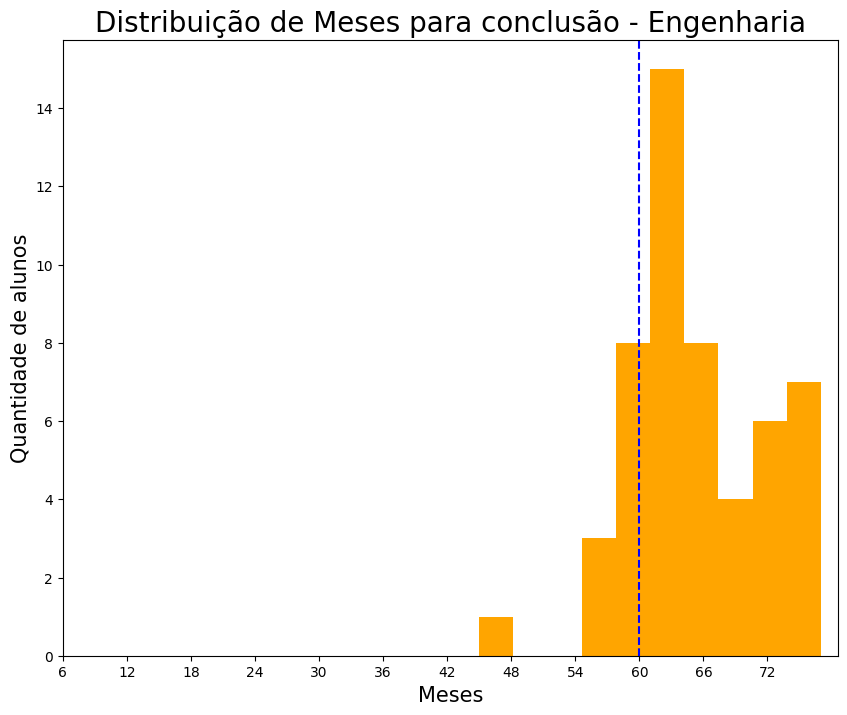

In [ ]:
valor_max = df_conclusao_eng['Meses Conclusao'].max()
hist_eng = df_conclusao_eng['Meses Conclusao'].hist(color='orange', grid=False,  figsize=(10, 8))
hist_eng.axvline(x=60, color='b', linestyle='--')
plt.title('Distribuição de Meses para conclusão - Engenharia', fontsize=20)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Quantidade de alunos', fontsize=15)
plt.xticks(np.arange(6, valor_max, 6))
plt.show()

In [ ]:
concluintes_certo2 = df_conclusao_eng[df_conclusao_eng['Meses Conclusao'] > 60]['Meses Conclusao'].value_counts().sum()
percent = (concluintes_certo2 / len(df_conclusao_eng)) * 100
print(f"A porcentagem de valores menores ou igual que 60 é {percent:.2f}%")

A porcentagem de valores menores ou igual que 60 é 76.92%


In [ ]:
labels = ['Superior 60 meses ', 'Igual ou inferior a 60 meses']
sizes = [percent, 100-percent]
colors = ["royalblue","orange"]

fig = px.pie(values=sizes, names=['Superior 60 meses','Igual ou inferior a 60 meses'],color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Tempo de Conclusão - Engenharia da Computação')

fig.update_traces(textfont_size=16)
fig.show()


#####**Meses por semestre**

In [ ]:
df_conclusao_eng[['Meses Conclusao','Matricula']]

,Meses Conclusao,Matricula
150,66,20161
151,66,20161
152,73,20162
153,73,20162
154,73,20162
155,65,20171
156,61,20172
157,61,20172
158,61,20172
159,68,20171


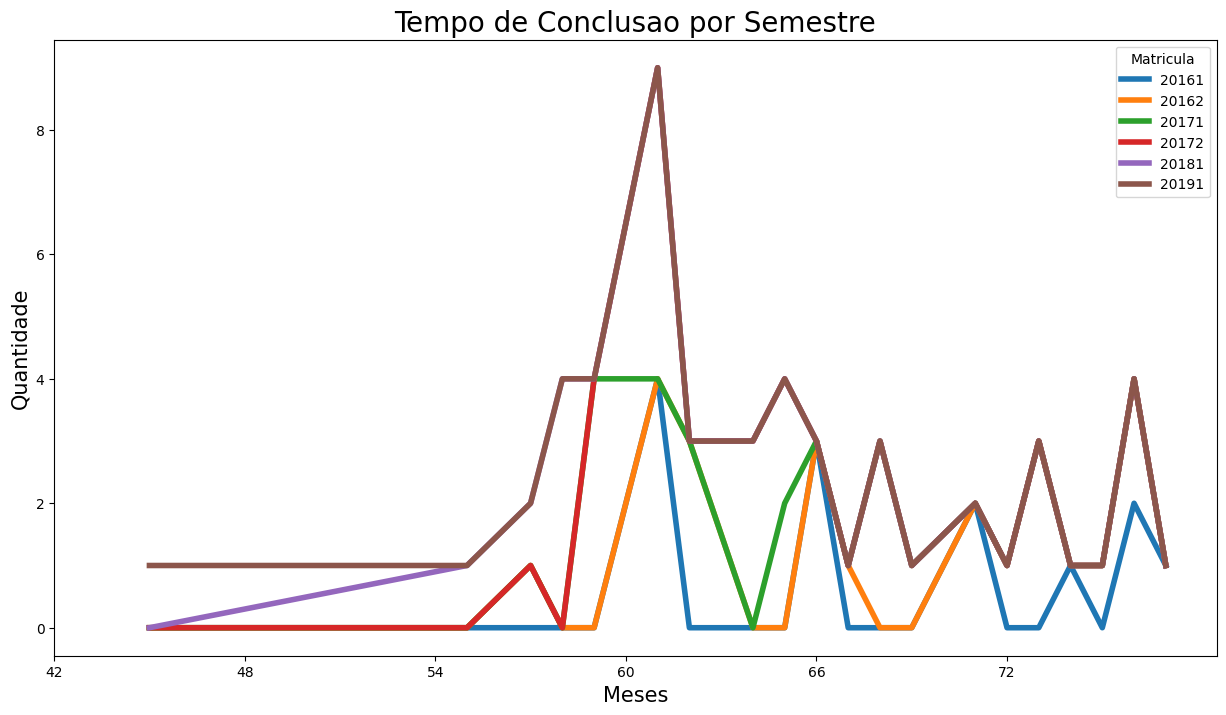

In [ ]:
valor_min = df_conclusao_eng['Meses Conclusao'].min()
valor_max = df_conclusao_eng['Meses Conclusao'].max()
ocorrencia = df_conclusao_eng.groupby(['Meses Conclusao','Matricula']).size().unstack()

ocorrencia.plot(kind='line', stacked=True, linewidth=4, figsize=(15, 8))

plt.title('Tempo de Conclusao por Semestre', fontsize=20)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.xticks(np.arange(42, valor_max, 6))
plt.show()


In [ ]:
ocorrencia

Matricula,20161,20162,20171,20172,20181,20191
Meses Conclusao,,,,,,
45,NaN,NaN,NaN,NaN,NaN,1.0
55,NaN,NaN,NaN,NaN,1.0,NaN
57,NaN,1.0,NaN,NaN,1.0,NaN
58,NaN,NaN,NaN,NaN,4.0,NaN
59,NaN,NaN,4.0,NaN,NaN,NaN
61,4.0,NaN,NaN,5.0,NaN,NaN
62,NaN,3.0,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,3.0,NaN,NaN
65,NaN,NaN,2.0,2.0,NaN,NaN


In [ ]:
menor_que_60 = ocorrencia.loc[ocorrencia.index <= 60]
resultados_menor_que_60 = {}
resultados_maior_que_60 = {}
for coluna in ocorrencia.columns:
    total = ocorrencia[coluna].count()
    menor_que_60_total = menor_que_60[coluna].count()
    porcentagem_menor_que_60 = menor_que_60_total / total * 100
    resultados_menor_que_60[coluna] = porcentagem_menor_que_60
    resultados_maior_que_60[coluna] = 100 - porcentagem_menor_que_60


In [ ]:
turmas = list(resultados_maior_que_60.keys())
resultados_maior_que_60_values = list(resultados_maior_que_60.values())
resultados_menor_que_60_values = list(resultados_menor_que_60.values())

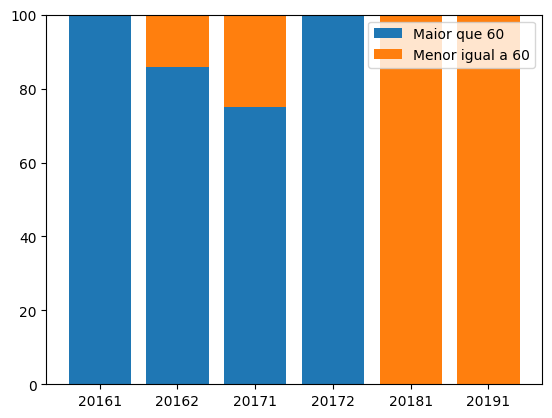

In [ ]:
periodos = ocorrencia.columns.astype(str)
plt.bar(periodos, resultados_maior_que_60_values, label='Maior que 60')
plt.bar(periodos, resultados_menor_que_60_values, bottom=resultados_maior_que_60_values, label='Menor igual a 60')
plt.legend()
plt.show()

#### **Telemática**

In [ ]:
df_telematica_novo.columns

Index(['#', 'Matricula', 'Curso', 'Situacao', 'Situacao no ultimo periodo',
       'Ano de conclusao', 'Ano de ingresso',
       'Diarios matriculados no ultimo periodo', 'Data da matricula',
       'Data de conclusao', 'Forma de ingresso', 'Naturalidade', 'Sexo',
       'Tipo da escola anterior', 'Tipo da zona residencial'],
      dtype='object')

##### **Por meses**

In [ ]:
df_conclusao_tel = df_telematica_novo.copy()

indexNames = df_conclusao_tel[(df_conclusao_tel['Data de conclusao'] == '-')].index

df_conclusao_tel.drop(indexNames, inplace=True)


In [ ]:
df_conclusao_tel['Data da matricula'] = pd.to_datetime(df_conclusao_tel['Data da matricula'], format='%Y/%m/%d %H:%M:%S')
df_conclusao_tel['Data de conclusao'] = pd.to_datetime(df_conclusao_tel['Data de conclusao'], format='%Y/%m/%d %H:%M:%S')

In [ ]:
df_conclusao_tel['Meses Conclusao'] = ((df_conclusao_tel['Data de conclusao'] - df_conclusao_tel['Data da matricula']).dt.days)/30
df_conclusao_tel['Meses Conclusao']=df_conclusao_tel['Meses Conclusao'].astype(int)

In [ ]:
df_conclusao_tel['Meses Conclusao'].describe().astype(int)

count    130
mean      57
std       17
min       32
25%       46
50%       55
75%       67
max      136
Name: Meses Conclusao, dtype: int64

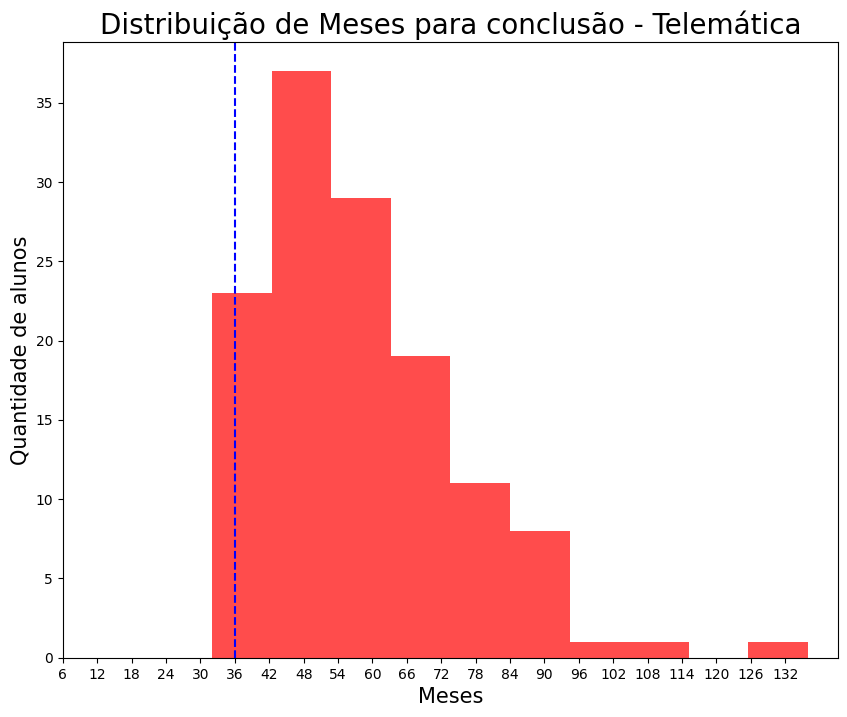

In [ ]:
valor_max_tel = df_conclusao_tel['Meses Conclusao'].max()
hist = df_conclusao_tel['Meses Conclusao'].hist(color='red', alpha=0.7, grid=False, figsize=(10, 8))
hist.axvline(x=36, color='b', linestyle='--')
plt.title('Distribuição de Meses para conclusão - Telemática', fontsize=20)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Quantidade de alunos', fontsize=15)
plt.xticks(np.arange(6, valor_max_tel, 6))
plt.show()

In [ ]:
colors = ['#FF6347']
fig = px.histogram(df_conclusao_tel,x='Meses Conclusao',color_discrete_sequence=colors)
fig.show()

In [ ]:
concluintes_certo = df_conclusao_tel[df_conclusao_tel['Meses Conclusao'] > 36]['Meses Conclusao'].value_counts().sum()
percent = (concluintes_certo / len(df_conclusao_tel)) * 100
print(f"A porcentagem de valores maiores que 36 é {percent:.2f}%")

A porcentagem de valores maiores que 36 é 96.15%


In [ ]:
labels = ['Superior 36 meses ', 'Igual ou inferior a 36 meses']
sizes = [percent, 100-percent]
colors = ["royalblue","orange"]

fig = px.pie(values=sizes, names=['Superior 36 meses','Igual ou inferior a 36 meses'],color_discrete_sequence=colors)

fig.update_layout(width = 1000, height = 600,
                  margin = dict(t=50, l=100, r=100, b=0),title='Tempo de Conclusão - Telemática')

fig.update_traces(textfont_size=16)
fig.show()

#####**Meses por semestre**

In [ ]:
df_conclusao_tel[['Meses Conclusao','Matricula']]

,Meses Conclusao,Matricula
255,38,20191
278,38,20191
330,49,20182
333,37,20182
348,55,20181
...,...,...
1310,78,20071
1313,48,20071
1323,72,20071
1325,38,20071


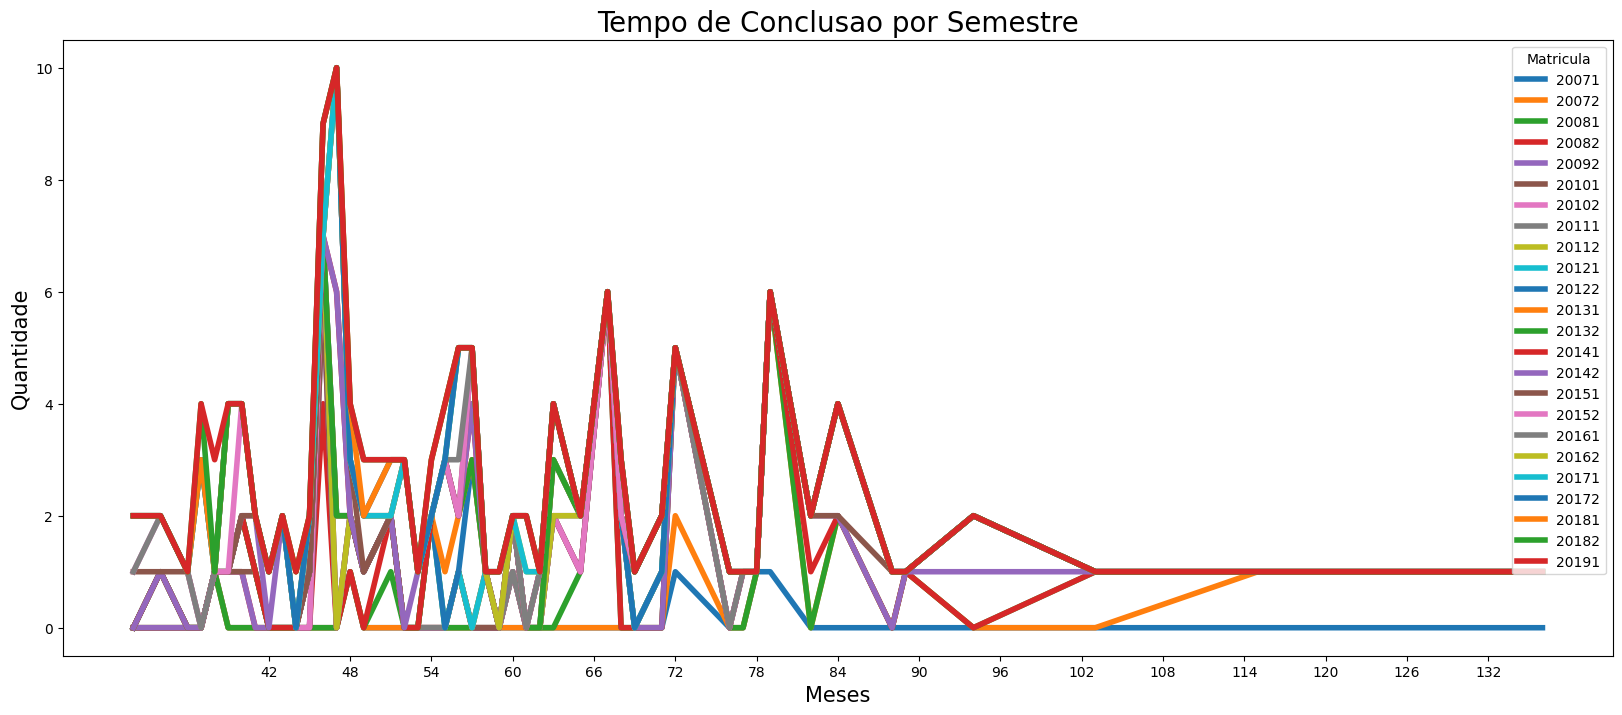

In [ ]:
valor_min = df_conclusao_tel['Meses Conclusao'].min()
valor_max = df_conclusao_tel['Meses Conclusao'].max()

ocorrencia = df_conclusao_tel.groupby(['Meses Conclusao', 'Matricula']).size().unstack()

ocorrencia.plot(kind='line', stacked=True, linewidth=4, figsize=(20, 8))

plt.title('Tempo de Conclusao por Semestre', fontsize=20)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.xticks(np.arange(42, valor_max, 6))
plt.show()

In [ ]:
ocorrencia

Matricula,20071,20072,20081,20082,20092,20101,20102,20111,20112,20121,...,20142,20151,20152,20161,20162,20171,20172,20181,20182,20191
Meses Conclusao,,,,,,,,,,,,,,,,,,,,,
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1.0,NaN
38,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
39,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
menor_que_36 = ocorrencia.loc[ocorrencia.index <= 36]
resultados_menor_que_36 = {}
resultados_maior_que_36 = {}
for coluna in ocorrencia.columns:
    total = ocorrencia[coluna].count()
    menor_que_36_total = menor_que_36[coluna].count()
    porcentagem_menor_que_36 = menor_que_36_total / total * 100
    resultados_menor_que_36[coluna] = porcentagem_menor_que_36
    resultados_maior_que_36[coluna] = 100 - porcentagem_menor_que_36


In [ ]:
turmas = list(resultados_maior_que_36.keys())
resultados_maior_que_36_values = list(resultados_maior_que_36.values())
resultados_menor_que_36_values = list(resultados_menor_que_36.values())

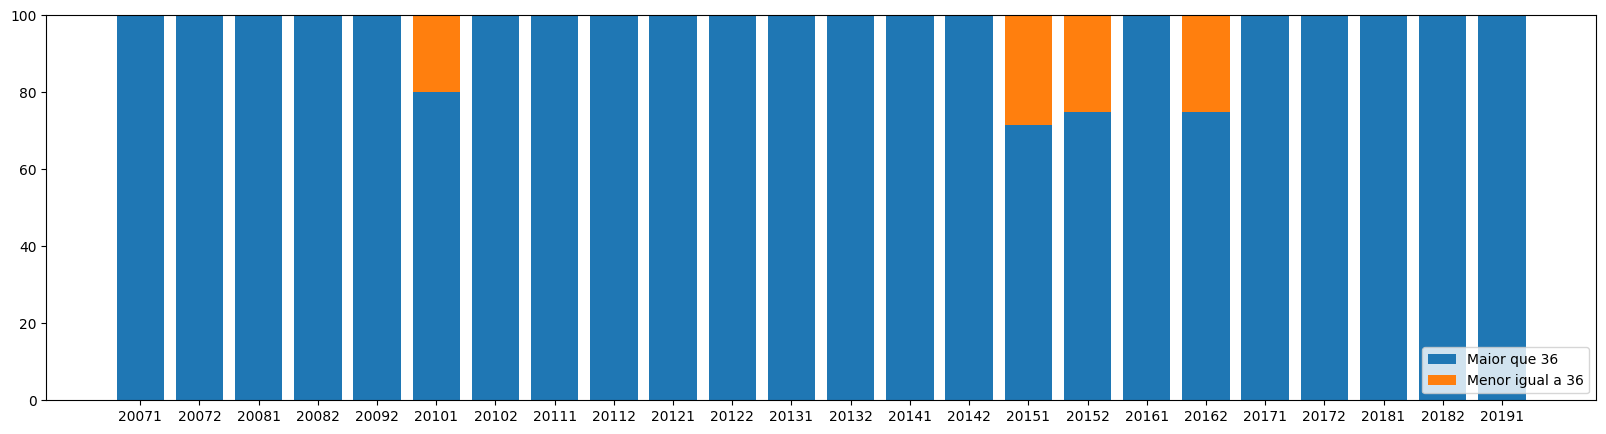

In [ ]:
periodos = ocorrencia.columns.astype(str)
plt.figure(figsize=(20, 5))
plt.bar(periodos, resultados_maior_que_36_values, label='Maior que 36')
plt.bar(periodos, resultados_menor_que_36_values, bottom=resultados_maior_que_36_values, label='Menor igual a 36')
plt.legend(loc='lower right')
plt.show()

### **Tipos de situação por semestre**

#### **Geral**

In [ ]:
df_novo['Situacao'] = df_novo['Situacao'].replace( ['cancelado voluntariamente', 'cancelado compulsoriamente', 'evadido', 'afastado','transferido externamente', 'transferido internamente'], 'evadido')
df_novo['Situacao'] = df_novo['Situacao'].replace( ['matriculado',  'intercambio', 'vinculado','trancado','trancado voluntariamente'], 'matriculado')
df_novo['Situacao'].unique()

df_novo['Matricula'] = df_novo['Matricula'].astype(str)

counts = df_novo.groupby(['Matricula', 'Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

colors = ['#FF6347','black','#9ACD32','#6495ED']
fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação dos alunos de cada semestre Geral',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Semestre'})
fig.show()

#### **Engenharia**

In [ ]:
df_engenharia_novo['Situacao'] = df_engenharia_novo['Situacao'].replace( ['Cancelado voluntariamente', 'Cancelado compulsoriamente', 'Evadido','Transferido externamente', 'Transferido internamente'], 'evadido')
df_engenharia_novo['Situacao'] = df_engenharia_novo['Situacao'].replace( ['Matriculado',  'Intercambio', 'Vinculado','Trancado','Trancado voluntariamente','Afastado'], 'matriculado')
df_engenharia_novo['Situacao'].unique()

df_engenharia_novo['Matricula'] = df_engenharia_novo['Matricula'].astype(str)

counts = df_engenharia_novo.groupby(['Matricula', 'Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

colors = ['#9ACD32','#FF6347','#6495ED','black']
fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação dos alunos de cada semestre em Engenharia de Computação',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Semestre'})
fig.show()

In [ ]:
df_engenharia_novo['Situacao'] = df_engenharia_novo['Situacao'].replace( ['Cancelado voluntariamente', 'Cancelado compulsoriamente', 'Evadido','Transferido externamente', 'Transferido internamente'], 'evadido')
df_engenharia_novo['Situacao'] = df_engenharia_novo['Situacao'].replace( ['Matriculado',  'Intercambio', 'Vinculado','Trancado','Trancado voluntariamente','Afastado'], 'matriculado')
df_engenharia_novo['Situacao'].unique()

df_engenharia_novo['Matricula'] = df_engenharia_novo['Matricula'].astype(str)

counts = df_engenharia_novo.groupby(['Matricula', 'Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

colors = ['#9ACD32','#FF6347','#6495ED','black']
fig = px.bar(counts,barmode = 'stack',color='Situacao', title='Situação dos alunos de cada semestre em Engenharia de Computação',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Semestre'})
fig.show()

In [ ]:
total_alunos_eng = len(df_engenharia_novo['Matricula'])
fig = go.Figure()
fig = go.Figure(go.Indicator(
    mode = "number",
    value = total_alunos_eng,))
fig.update_layout(
    template = {'data' : {'indicator': [{
        'title': {'text': "TOTAL DE ALUNOS DOS CURSOS DE TIC - IFPB"},}]
                         }})
fig.show()

#### **Telemática**

In [ ]:
df_telematica_novo['Situacao'] = df_telematica_novo['Situacao'].replace( ['Cancelado voluntariamente', 'Cancelado compulsoriamente', 'Evadido','Transferido externamente', 'Transferido internamente'], 'evadido')
df_telematica_novo['Situacao'] = df_telematica_novo['Situacao'].replace( ['Matriculado',  'Intercambio', 'Vinculado','Trancado','Trancado voluntariamente','Afastado'], 'matriculado')
df_telematica_novo['Situacao'].unique()

df_telematica_novo['Matricula'] = df_telematica_novo['Matricula'].astype(str)

counts = df_telematica_novo.groupby(['Matricula', 'Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

colors = ['black','#9ACD32','#FF6347','#6495ED']
fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação dos alunos de cada semestre em Telemática',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Semestre'})
fig.show()

In [ ]:
df_telematica_novo['Situacao'] = df_telematica_novo['Situacao'].replace( ['Cancelado voluntariamente', 'Cancelado compulsoriamente', 'Evadido','Transferido externamente', 'Transferido internamente'], 'evadido')
df_telematica_novo['Situacao'] = df_telematica_novo['Situacao'].replace( ['Matriculado',  'Intercambio', 'Vinculado','Trancado','Trancado voluntariamente','Afastado'], 'matriculado')
df_telematica_novo['Situacao'].unique()

df_telematica_novo['Matricula'] = df_telematica_novo['Matricula'].astype(str)

counts = df_telematica_novo.groupby(['Matricula', 'Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

colors = ['black','#9ACD32','#FF6347','#6495ED']
fig = px.bar(counts,barmode = 'stack',color='Situacao', title='Situação dos alunos de cada semestre em Telemática',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Semestre'})
fig.show()

In [ ]:
total_alunos_tel = len(df_telematica_novo['Matricula'])
fig = go.Figure()
fig = go.Figure(go.Indicator(
    mode = "number",
    value = total_alunos_tel,))
fig.update_layout(
    template = {'data' : {'indicator': [{
        'title': {'text': "TOTAL DE ALUNOS DOS CURSOS DE TIC - IFPB"},}]
                         }})
fig.show()

#### **Engenharia X Telemática - Evadidos**

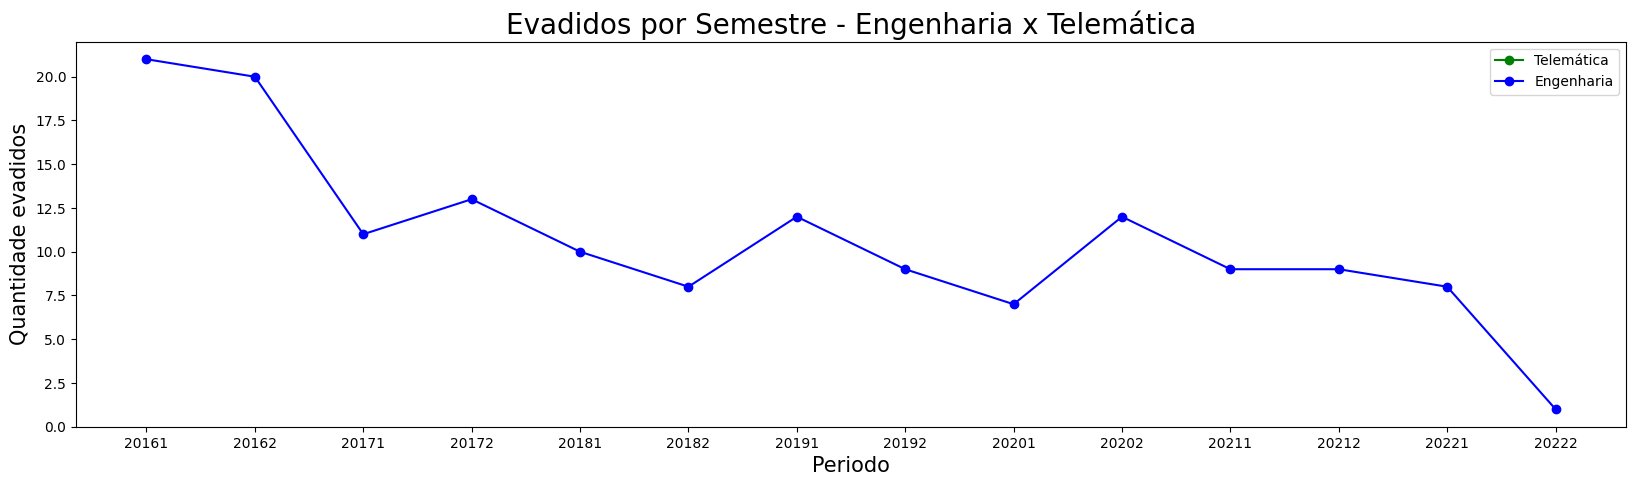

In [ ]:
df_evadido_eng = df_engenharia_novo[df_engenharia_novo.Situacao.isin(['evadido'])].groupby(df_engenharia_novo['Matricula'].astype(str)).size()
df_evadido_tel = df_telematica_novo[df_telematica_novo.Situacao.isin(['evadido'])].groupby(df_telematica_novo['Matricula'].astype(str)).size()

fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(df_evadido_tel, '-o', color='green', label='Telemática')
ax.plot(df_evadido_eng, '-o', color='blue', label='Engenharia')

plt.title('Evadidos por Semestre - Engenharia x Telemática', fontsize=20)
plt.xlabel('Periodo', fontsize=15)
plt.ylabel('Quantidade evadidos', fontsize=15)
ax.legend()
plt.show()


###**Alunos Matriculados e Formados por Semestre**

In [ ]:
df_novo['Matricula'] = df_novo['Matricula'].astype(str)
counts = df_novo.groupby(['Matricula', 'Sexo']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100

colors = ['#ff33dd','#33e0ff']
fig = px.bar(percentages,barmode = 'stack',color='Sexo', title='Quantidade de matricula por sexo de cada semestre nos cursos de TIC',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Semestre'})
fig.show()

####**Sexo Feminino**

#####**Matriculado**

**Engenharia**

In [ ]:
df_engenharia_novo['Matricula'] = df_engenharia_novo['Matricula'].astype(str)
counts = df_engenharia_novo.groupby(['Matricula', 'Sexo']).size()
counts = counts.unstack(level=-1)

colors = ['#ff33dd','#33e0ff']
fig = px.bar(counts,barmode = 'stack',color='Sexo', title='Quantidade de matricula por sexo de cada semestre - Engenharia',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Semestre'})
fig.show()

In [ ]:
df_matricula_engenharia = df_engenharia_novo[(df_engenharia_novo.Sexo=='F')]
df_matricula_engenharia['Matricula'] = df_matricula_engenharia['Matricula'].astype(str)
grafico_matricula_engenharia = df_matricula_engenharia['Matricula'].value_counts().sort_index()
colors = ['#6495ED']
fig = px.bar(grafico_matricula_engenharia,barmode = 'stack', title='Quantidade de Alunas matriculadas por Semestre de Ingresso - Engenharia',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Quantidade de alunas matriculadas'},
                   xaxis={'title': 'Semestre'},showlegend=False)
fig.show()

<ipython-input-46-f87d6a3a4bed>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_matricula_engenharia = df_engenharia_novo[(df_engenharia_novo.Sexo=='M')]
df_matricula_engenharia['Matricula'] = df_matricula_engenharia['Matricula'].astype(str)
grafico_matricula_engenharia = df_matricula_engenharia['Matricula'].value_counts().sort_index()
colors = ['#6495ED']
fig = px.bar(grafico_matricula_engenharia,barmode = 'stack', title='Quantidade de alunos matriculados do sexo por Semestre de Ingresso - Engenharia',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Quantidade de alunas matriculadas'},
                   xaxis={'title': 'Semestre'},showlegend=False)
fig.show()

<ipython-input-121-ca4f062ac83c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_matricula_engenharia = df_engenharia_novo[(df_engenharia_novo.Sexo=='F')]
df_matricula_engenharia['Matricula'] = df_matricula_engenharia['Matricula'].astype(str)

colors = ['#9ACD32','#FF6347','#6495ED']

counts = df_matricula_engenharia.groupby(['Matricula', 'Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100


fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação das alunas por Semestre de Ingresso - Engenharia',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Semestre'})
fig.show()

<ipython-input-50-ee4ec7895097>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_matricula_engenharia = df_engenharia_novo[(df_engenharia_novo.Sexo=='F')]
df_matricula_engenharia['Matricula'] = df_matricula_engenharia['Matricula'].astype(str)

colors = ['#9ACD32','#FF6347','#6495ED']

counts = df_matricula_engenharia.groupby(['Matricula', 'Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100


fig = px.bar(counts,barmode = 'stack',color='Situacao', title='Situação  por Semestre de Ingresso - Engenharia',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Semestre'})
fig.show()

<ipython-input-51-d2a2e9fa5a23>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Quantidade de alunos matriculados por semestre

In [ ]:
df_telematica_novo['Matricula'] = df_telematica_novo['Matricula'].astype(str)
counts = df_telematica_novo.groupby(['Matricula', 'Sexo']).size()
counts = counts.unstack(level=-1)

colors = ['#ff33dd','#33e0ff']
fig = px.bar(counts,barmode = 'stack',color='Sexo', title='Quantidade de matricula por sexo de cada semestre',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Semestre'})
fig.show()

In [ ]:
colors = ['#ff33dd','#33e0ff']
df_engenharia_novo['Matricula'] = df_engenharia_novo['Matricula'].astype(str)
counts = df_engenharia_novo.groupby(['Matricula', 'Sexo']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100


fig = px.bar(percentages,barmode = 'stack',color='Sexo', title='Porcentagem de matricula de alunos por sexo de cada semestre - Engenharia',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Semestre'})
fig.show()

**Telemática**

In [ ]:
df_matricula_telematica = df_telematica_novo[(df_telematica_novo.Sexo=='F')]
df_matricula_telematica['Matricula'] = df_matricula_telematica['Matricula'].astype(str)
grafico_matricula_telematica = df_matricula_telematica['Matricula'].value_counts().sort_index()
colors = ['#6495ED']
fig = px.bar(grafico_matricula_telematica,barmode = 'stack', title='Quantidade de Alunas matriculadas por Semestre de Ingresso - Telemática',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Quantidade de alunas matriculadas'},
                   xaxis={'title': 'Semestre'})
fig.show()

<ipython-input-42-b05af91d80c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matricula_telematica['Matricula'] = df_matricula_telematica['Matricula'].astype(str)


In [ ]:
df_matricula_telematica = df_telematica_novo[(df_telematica_novo.Sexo=='M')]
df_matricula_telematica['Matricula'] = df_matricula_telematica['Matricula'].astype(str)
grafico_matricula_telematica = df_matricula_telematica['Matricula'].value_counts().sort_index()
colors = ['#6495ED']
fig = px.bar(grafico_matricula_telematica,barmode = 'stack', title='Quantidade de Alunas matriculadas por Semestre de Ingresso - Telemática',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Quantidade de alunas matriculadas'},
                   xaxis={'title': 'Semestre'})
fig.show()

<ipython-input-43-327c15ab1aa6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_matricula_tel = df_telematica_novo[(df_telematica_novo.Sexo=='F')]
df_matricula_tel['Matricula'] = df_matricula_tel['Matricula'].astype(str)

colors = ['black','#9ACD32','#FF6347','#6495ED']

counts = df_matricula_tel.groupby(['Matricula', 'Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100


fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação das alunas por Semestre de Ingresso - Telemática',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Semestre'})
fig.show()

<ipython-input-56-a856a581b5ba>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_matricula_tel = df_telematica_novo[(df_telematica_novo.Sexo=='F')]
df_matricula_tel['Matricula'] = df_matricula_tel['Matricula'].astype(str)

colors = ['black','#9ACD32','#FF6347','#6495ED']

counts = df_matricula_tel.groupby(['Matricula', 'Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100


fig = px.bar(counts,barmode = 'stack',color='Situacao', title='Situação das alunas por Semestre de Ingresso - Telemática',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Semestre'})
fig.show()

<ipython-input-57-3889efa59e20>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
colors = ['#ff33dd','#33e0ff']
df_telematica_novo['Matricula'] = df_telematica_novo['Matricula'].astype(str)
counts = df_engenharia_novo.groupby(['Matricula', 'Sexo']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100


fig = px.bar(percentages,barmode = 'stack',color='Sexo', title='Porcentagem de matricula de alunos por sexo de cada semestre - Telemática',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Semestre'})
fig.show()

#####**Formado**

**Engenharia**

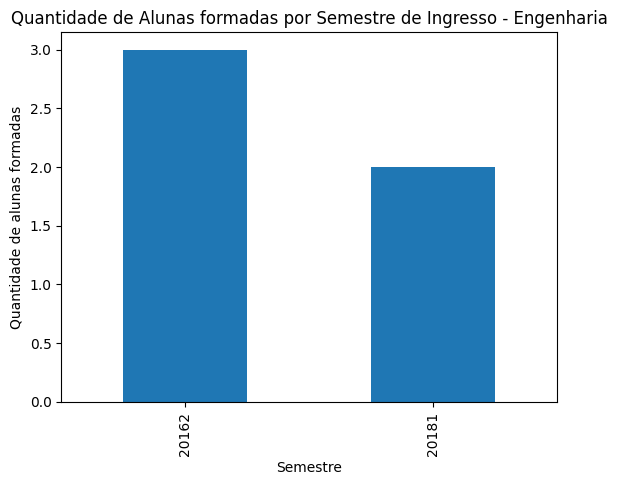

In [ ]:
df_matricula_engenharia = df_engenharia_novo[(df_engenharia_novo.Situacao=='Formado') & (df_engenharia_novo.Sexo=='F')]
grafico_matricula_engenharia = df_matricula_engenharia['Matricula'].value_counts().sort_index()

grafico_matricula_engenharia.plot(kind='bar', stacked='true')
plt.title('Quantidade de Alunas formadas por Semestre de Ingresso - Engenharia')
plt.xlabel('Semestre')
plt.ylabel('Quantidade de alunas formadas')
plt.show()

**Telemática**

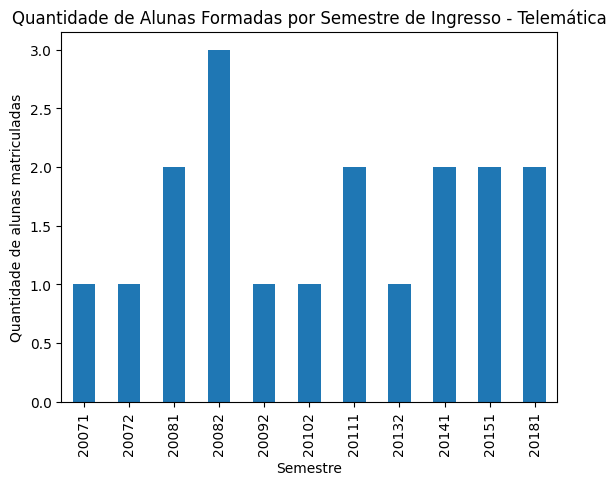

In [ ]:
df_matricula_telematica = df_telematica_novo[(df_telematica_novo.Situacao=='Formado') & (df_telematica_novo.Sexo=='F')]
grafico_matricula_telematica = df_matricula_telematica['Matricula'].value_counts().sort_index()

grafico_matricula_telematica.plot(kind='bar', stacked='true')
plt.title('Quantidade de Alunas Formadas por Semestre de Ingresso - Telemática')
plt.xlabel('Semestre')
plt.ylabel('Quantidade de alunas matriculadas')
plt.show()

####**Sexo Masculino**

**Engenharia**

In [ ]:
df_matricula_engenharia = df_engenharia_novo[(df_engenharia_novo.Sexo=='M')]
df_matricula_engenharia['Matricula'] = df_matricula_engenharia['Matricula'].astype(str)

colors = ['#9ACD32','#FF6347','#6495ED']

counts = df_matricula_engenharia.groupby(['Matricula', 'Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100


fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação dos alunos por Semestre de Ingresso - Engenharia',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Semestre'})

<ipython-input-52-2e4f86b4862b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_matricula_engenharia = df_engenharia_novo[(df_engenharia_novo.Sexo=='M')]
df_matricula_engenharia['Matricula'] = df_matricula_engenharia['Matricula'].astype(str)

colors = ['#9ACD32','#FF6347','#6495ED']

counts = df_matricula_engenharia.groupby(['Matricula', 'Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100


fig = px.bar(counts,barmode = 'stack',color='Situacao', title='Situação dos alunos por Semestre de Ingresso - Engenharia',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Semestre'})

<ipython-input-53-5cca97e1aac6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Telemática**

In [ ]:
df_matricula_telematica = df_telematica_novo[(df_telematica_novo.Sexo=='M')]
df_matricula_telematica['Matricula'] = df_matricula_telematica['Matricula'].astype(str)

colors = ['#9ACD32','#FF6347','#6495ED']

counts = df_matricula_telematica.groupby(['Matricula', 'Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100


fig = px.bar(percentages,barmode = 'stack',color='Situacao', title='Situação dos alunos por Semestre de Ingresso - Telemática',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Semestre'})

<ipython-input-54-c33e6abaa313>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_matricula_telematica = df_telematica_novo[(df_telematica_novo.Sexo=='M')]
df_matricula_telematica['Matricula'] = df_matricula_telematica['Matricula'].astype(str)

colors = ['#9ACD32','#FF6347','#6495ED']

counts = df_matricula_telematica.groupby(['Matricula', 'Situacao']).size()
counts = counts.unstack(level=-1)

totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0)*100


fig = px.bar(counts,barmode = 'stack',color='Situacao', title='Situação dos alunos por Semestre de Ingresso - Telemática',color_discrete_sequence=colors)
fig.update_layout(yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Semestre'})

<ipython-input-55-fe71ba6beeb0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

